In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('..')
import gym
import yowie_gym

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [5]:
import yowie_gym.bullet

# Reacher

In [6]:
env = gym.make('Simloc-Reacher-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Environment '<class 'yowie_gym.bullet.reacher2.env.ReacherBulletEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


## Passive Dynamics

In [7]:
frames = []
col_shape = (env.observation_space.shape[0],1)
x0 = env.reset()
S_zero = [x0.reshape(col_shape)]
g_zero = []
while True:
    frames += [ env.render(mode="rgb_array") ]
    u = np.zeros(env.action_space.shape[0])
    x, r, done, info = env.step(u)
    S_zero.append(x.reshape(col_shape))
    g_zero.append(r)
    if done: break
S_zero = np.hstack(S_zero)
g_zero = np.asarray(g_zero, dtype=np.float64)
J_zero = np.asarray([ np.sum(g_zero[k:]) for k in range(g_zero.shape[0])], dtype=np.float64)


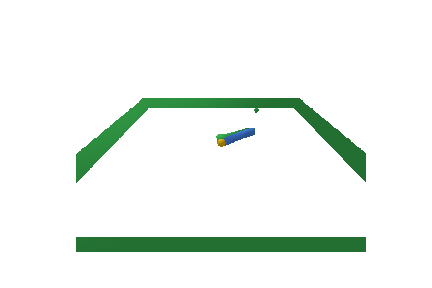
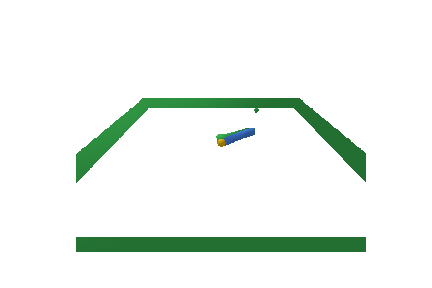
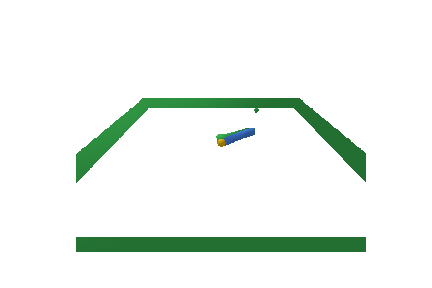
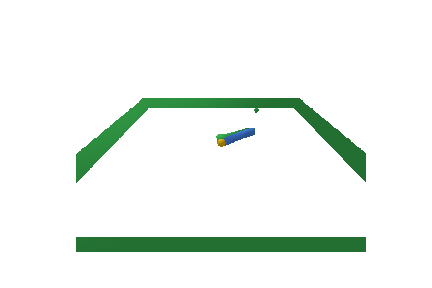
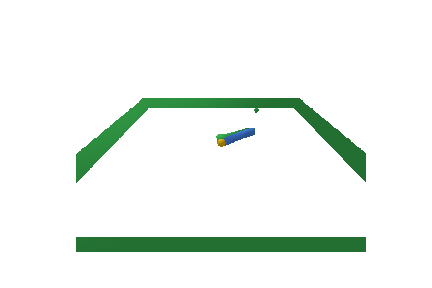
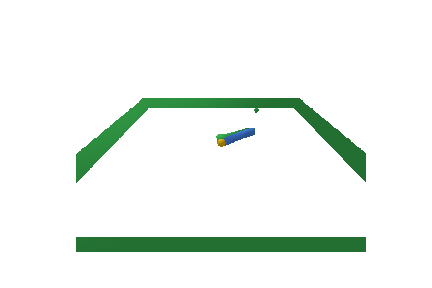
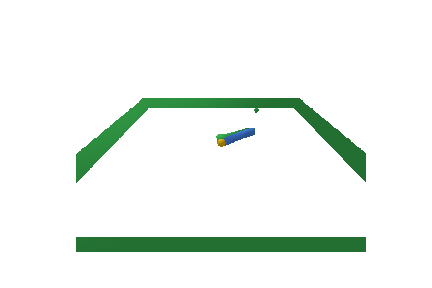
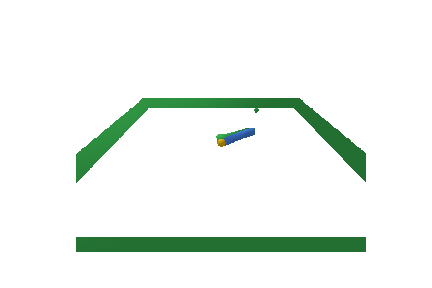
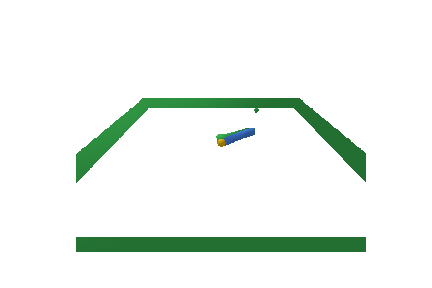
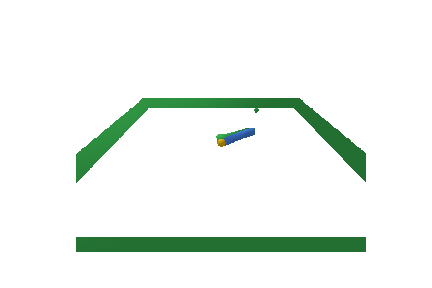
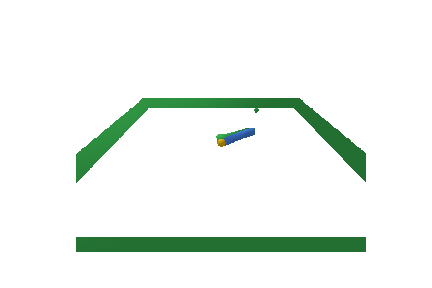
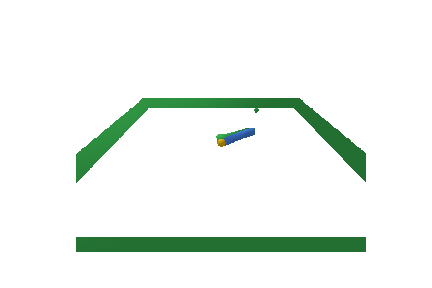
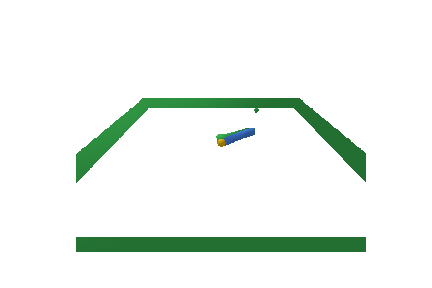
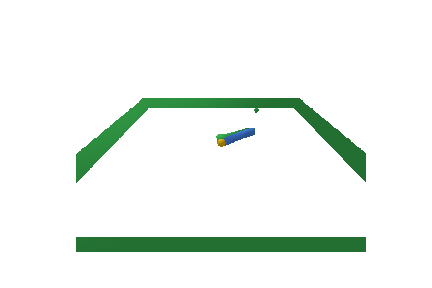
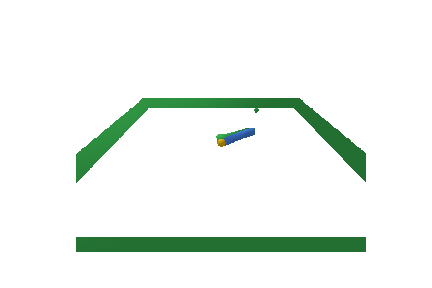
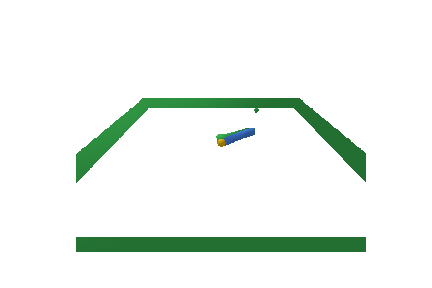
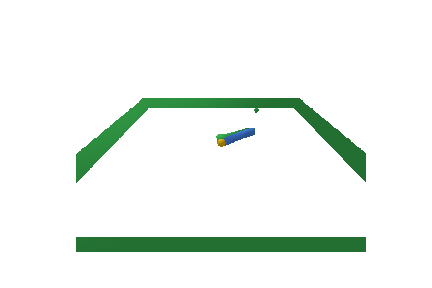
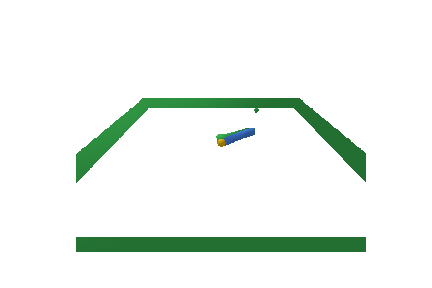
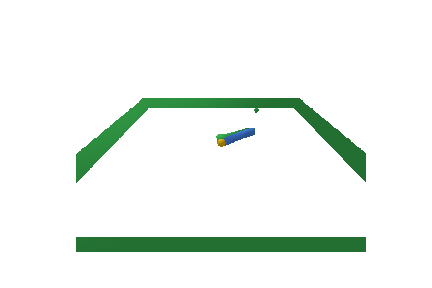
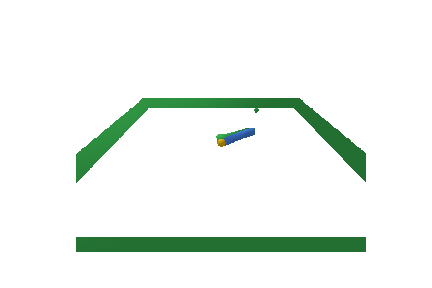
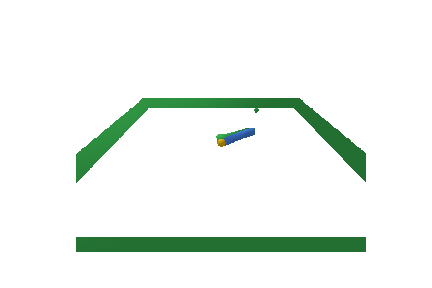
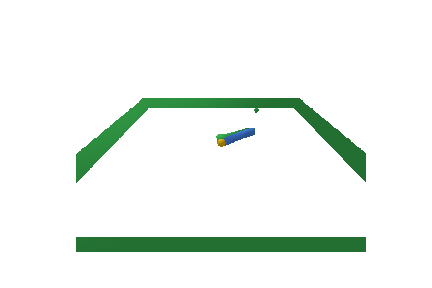
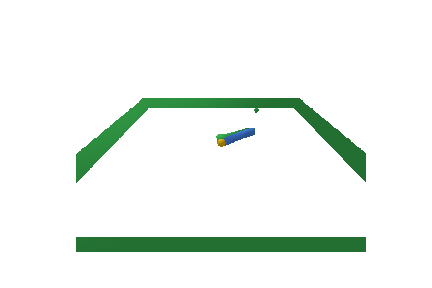
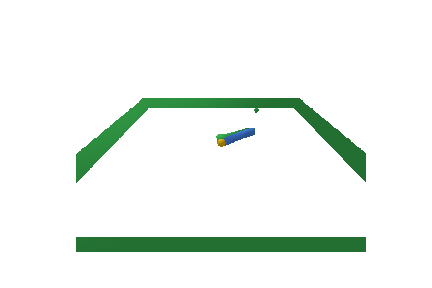
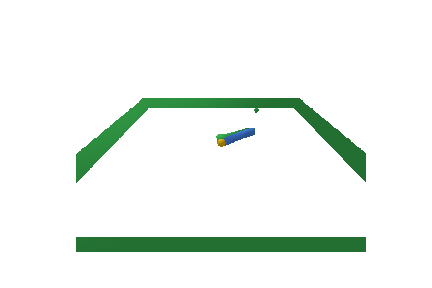
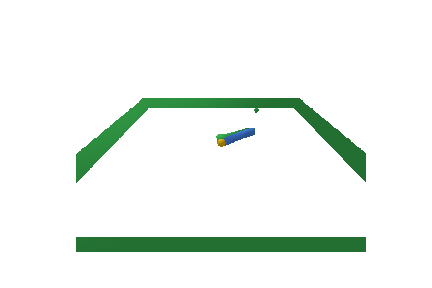
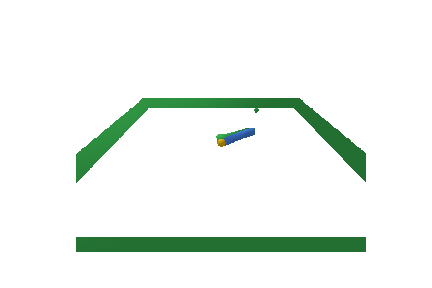
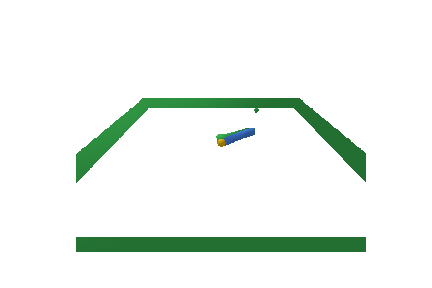
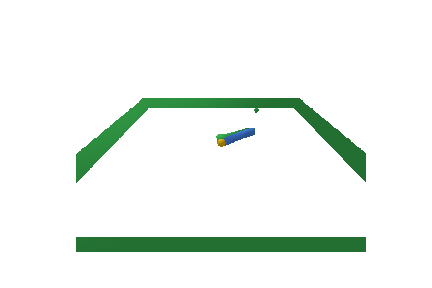
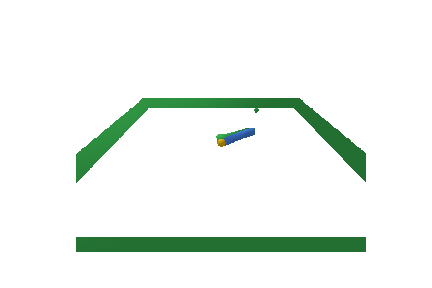
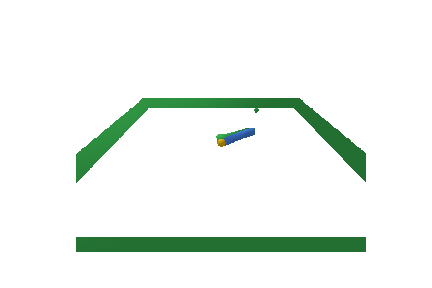
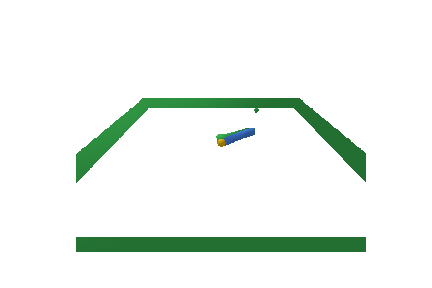
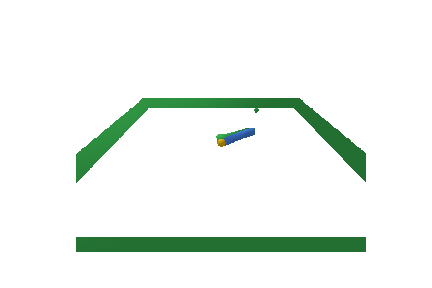
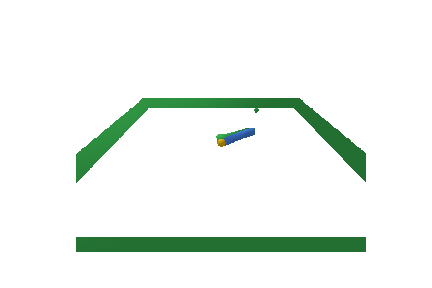
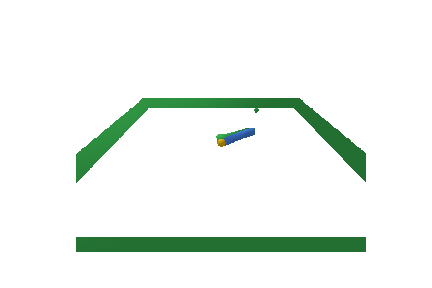
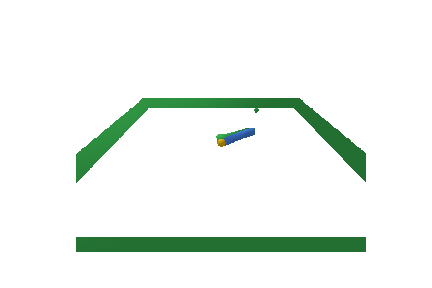
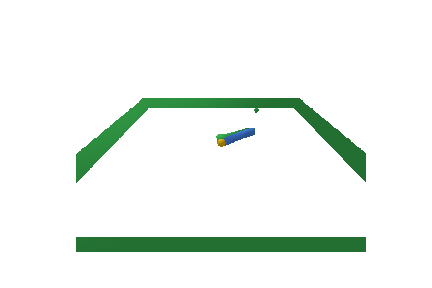
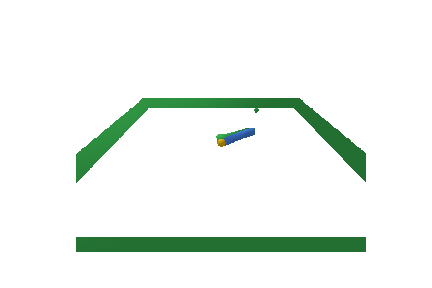
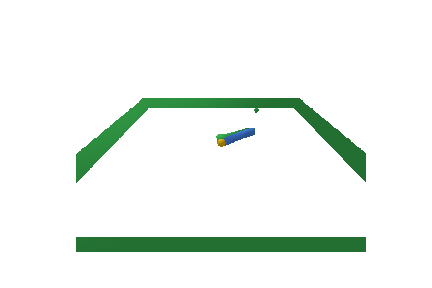
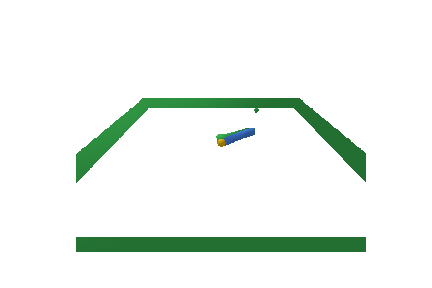
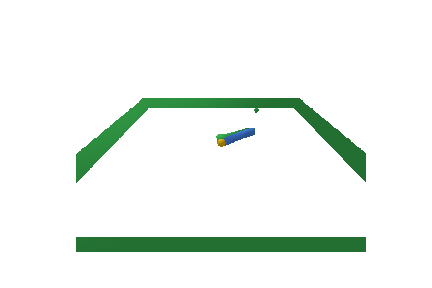
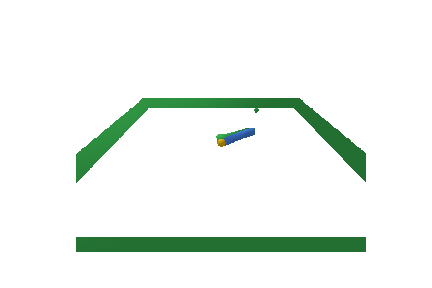
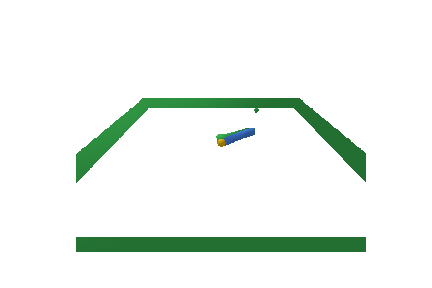
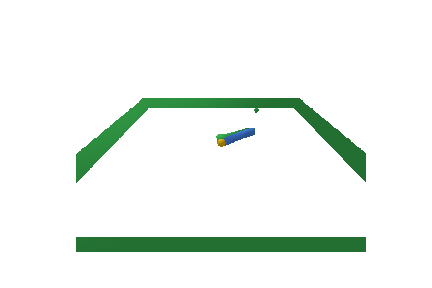
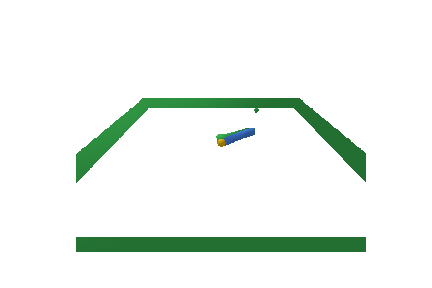
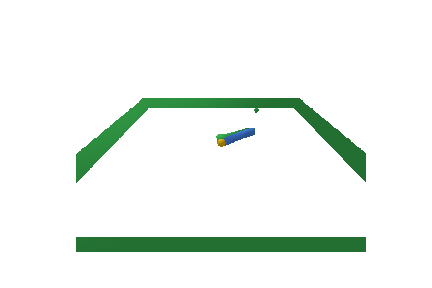
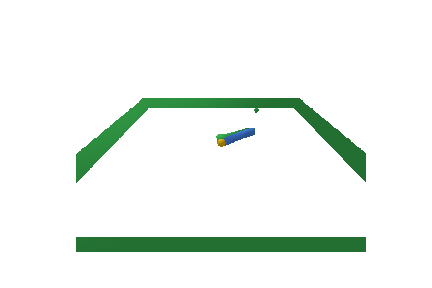
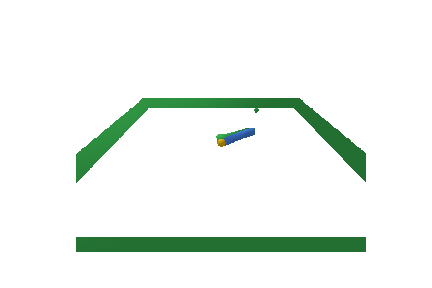
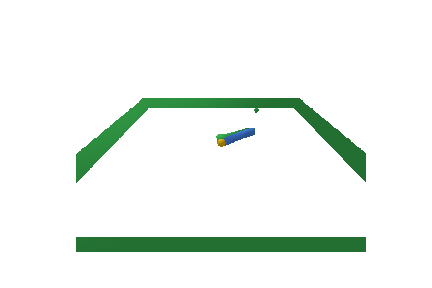
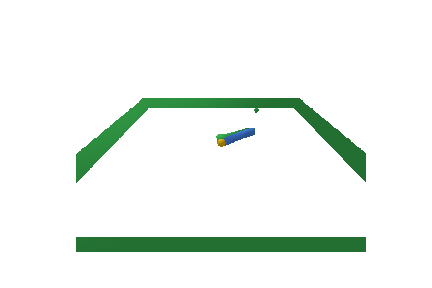
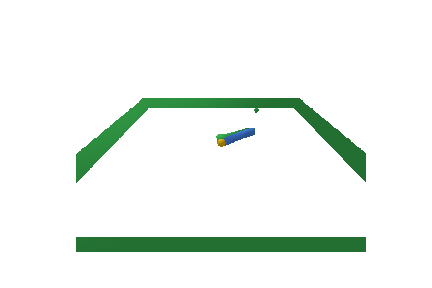
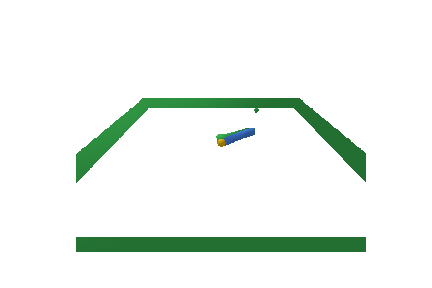
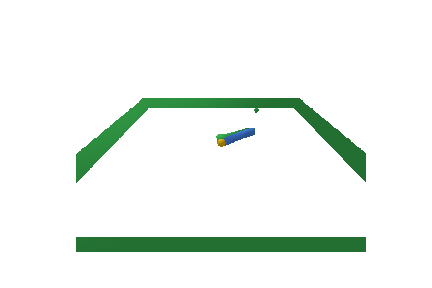
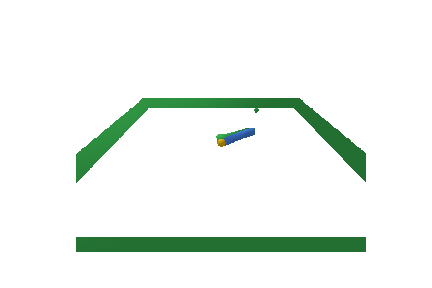
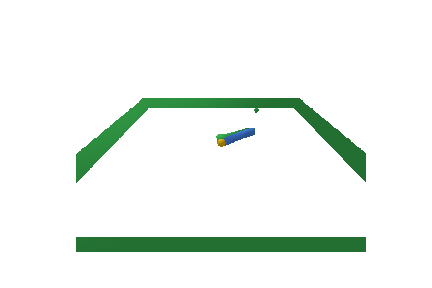
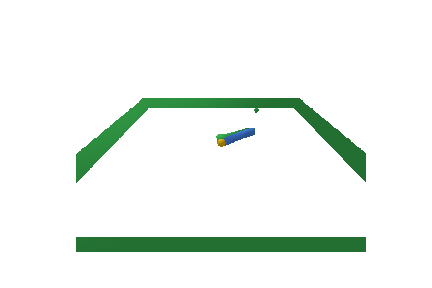
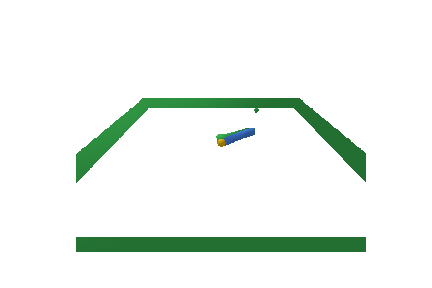
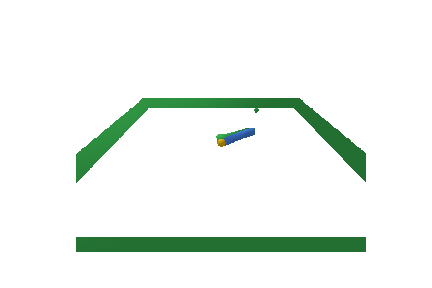
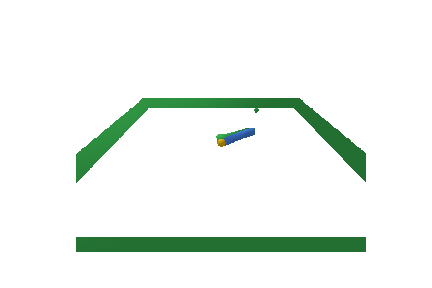
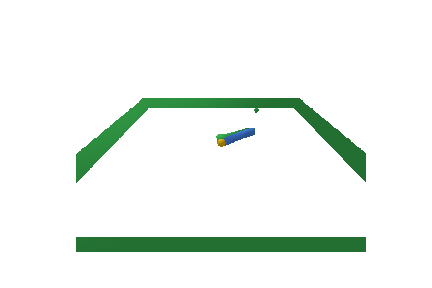
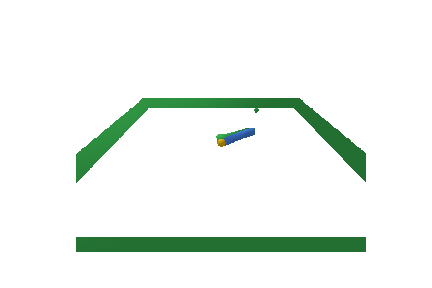
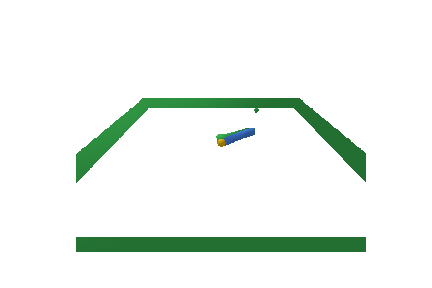
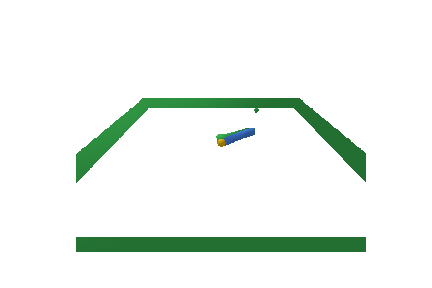
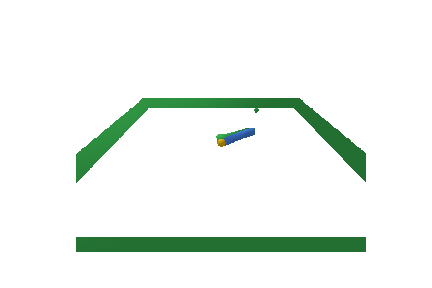
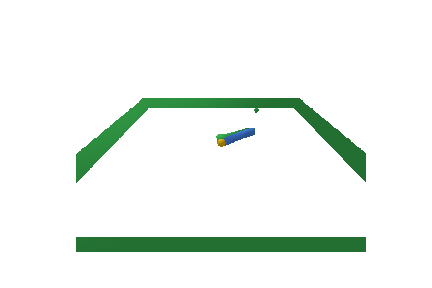
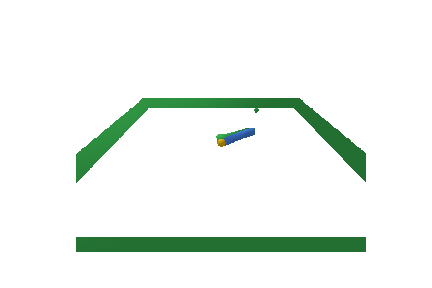
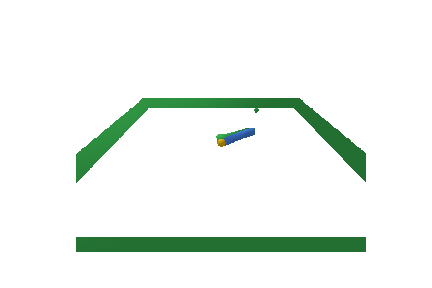
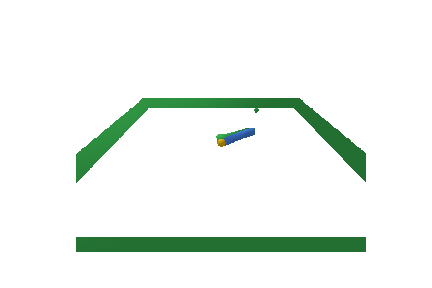
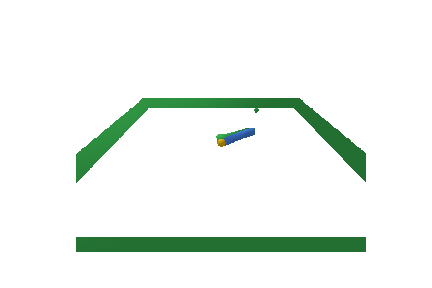
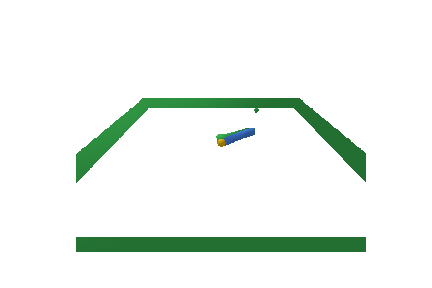
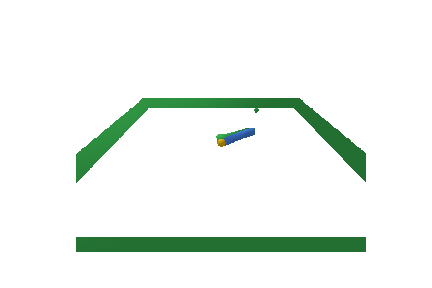
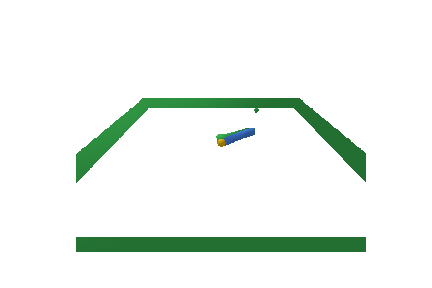
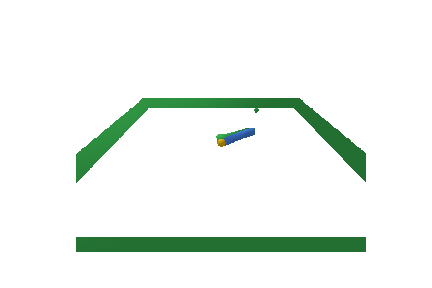
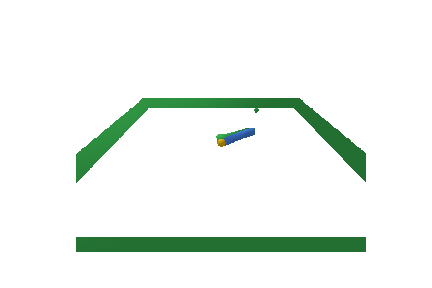
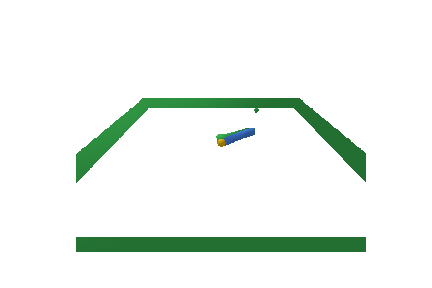
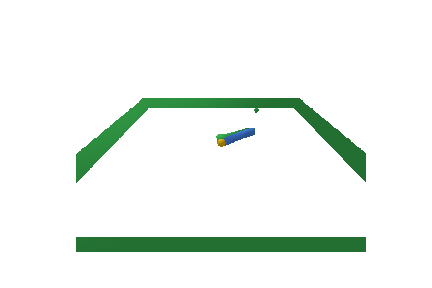
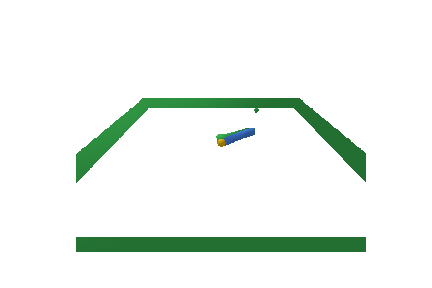
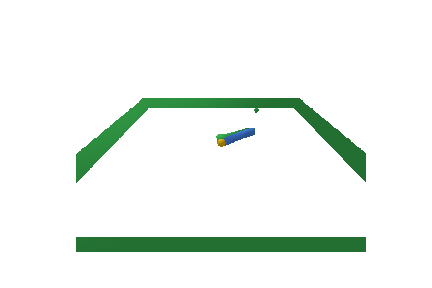
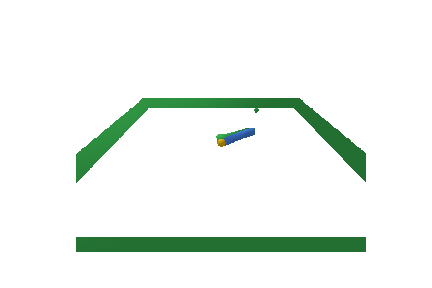
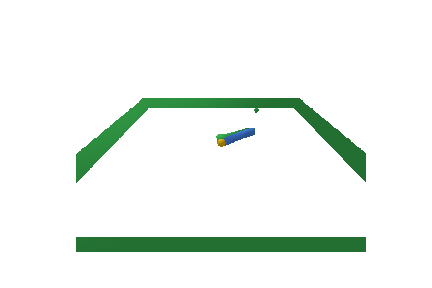
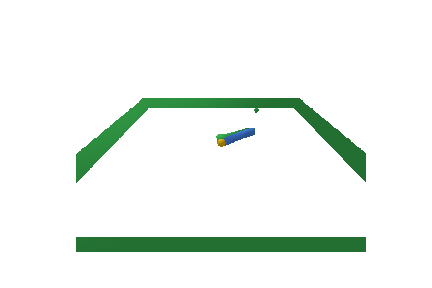
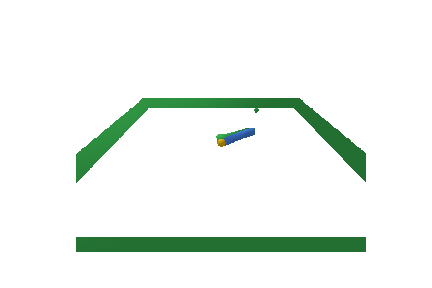
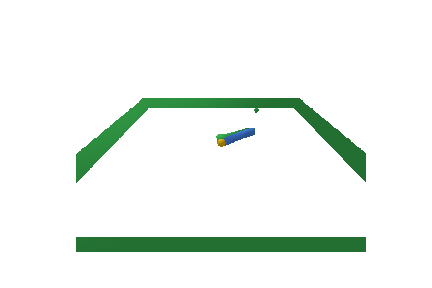
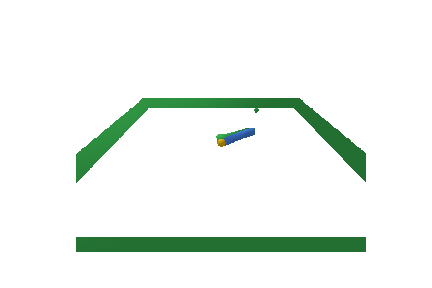
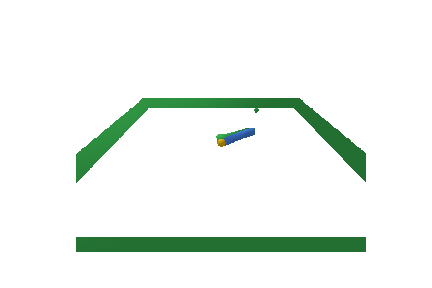
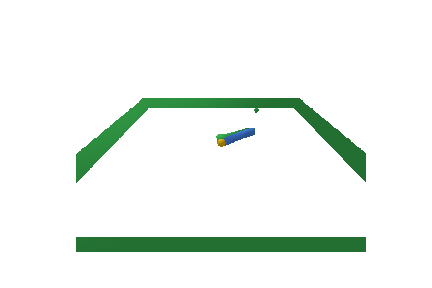
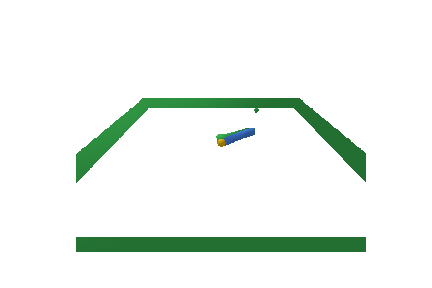
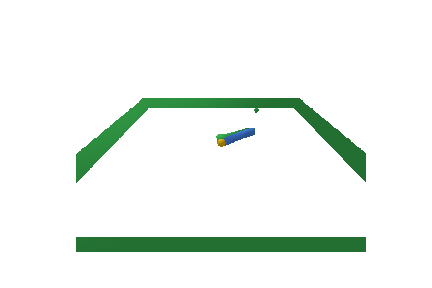
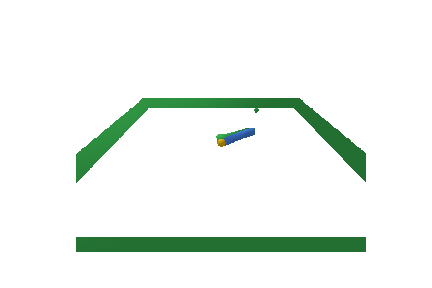
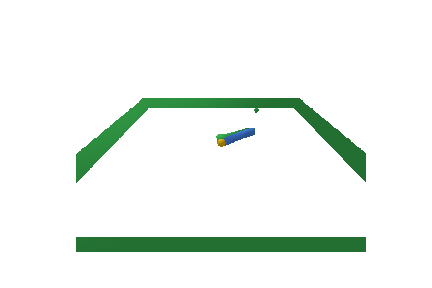
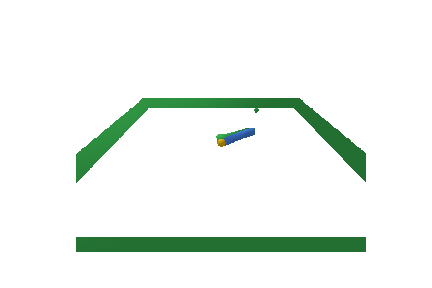
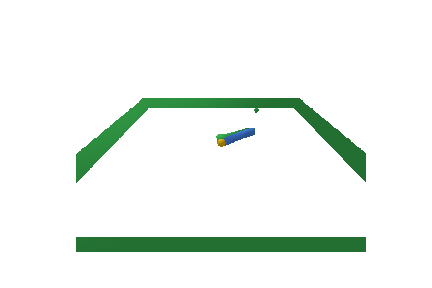
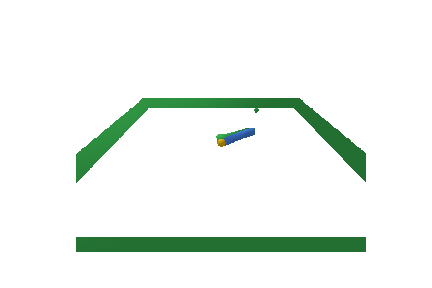
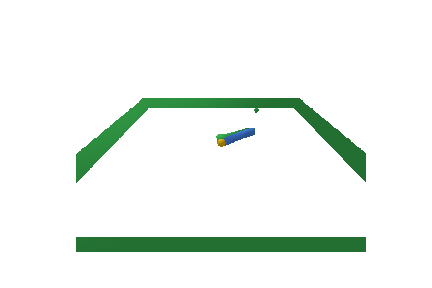
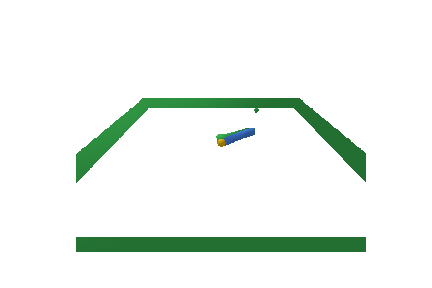
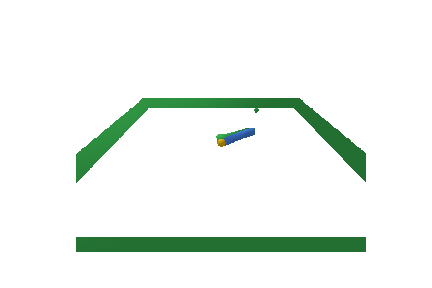
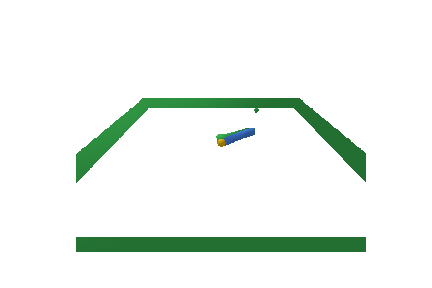
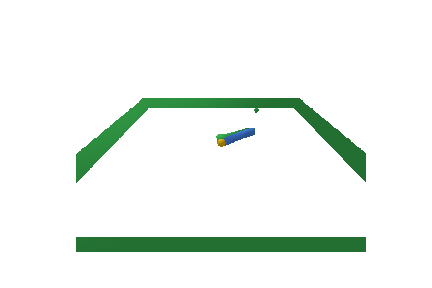
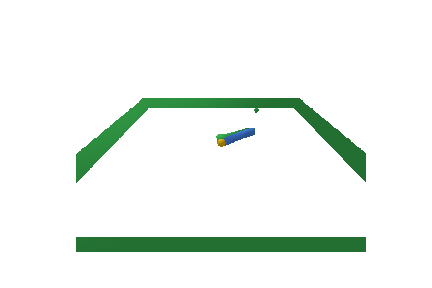
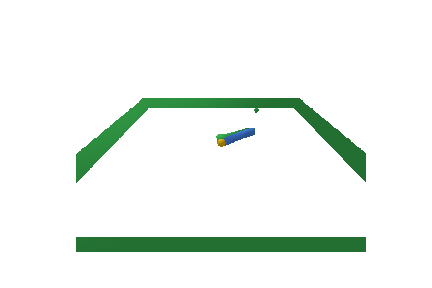
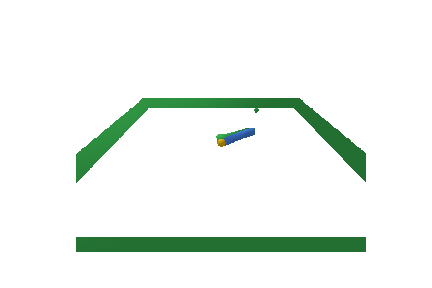
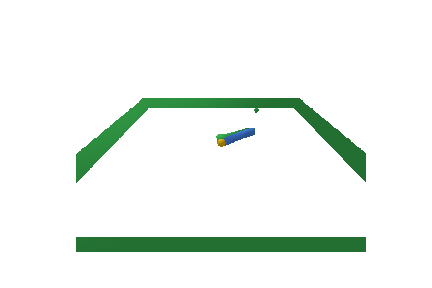
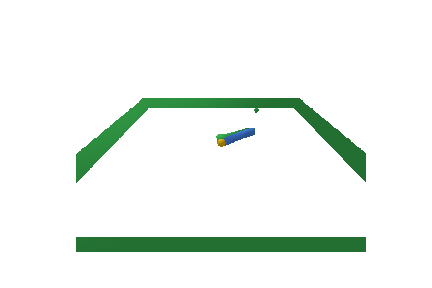
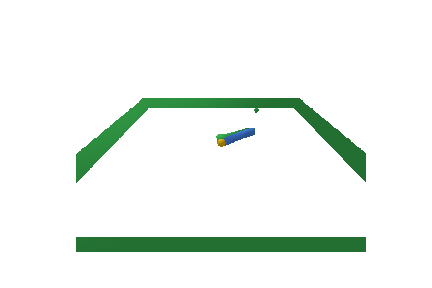
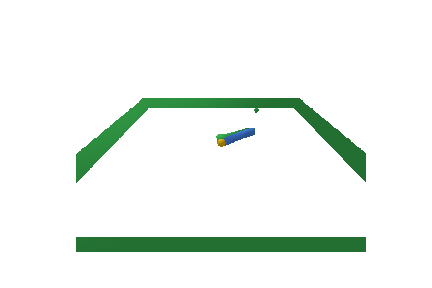
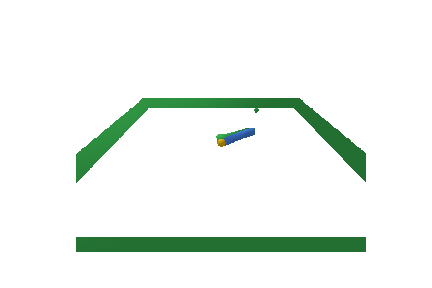
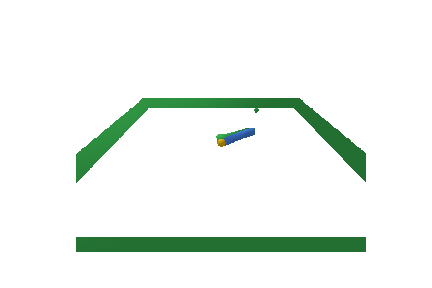
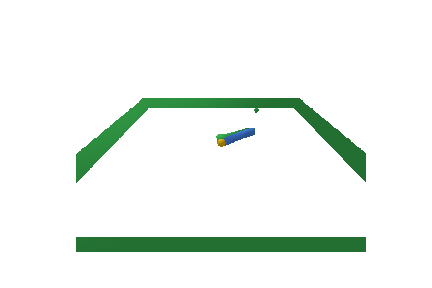
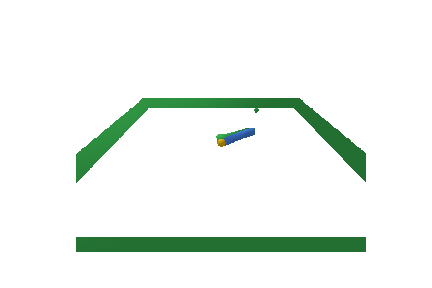
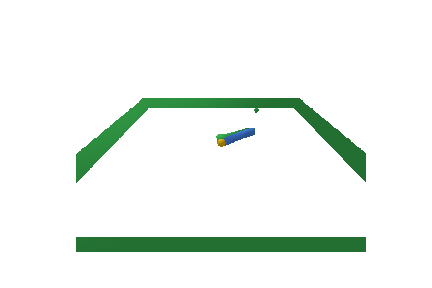
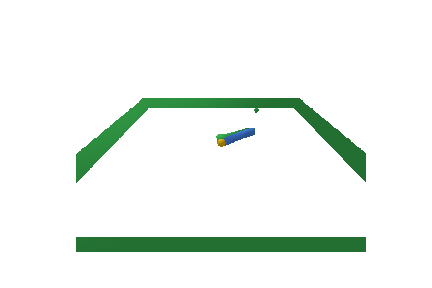
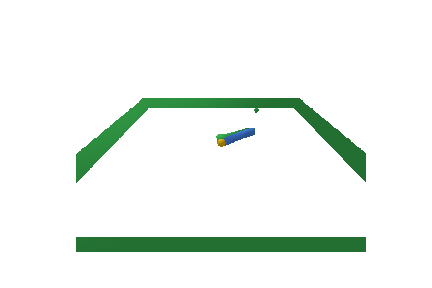
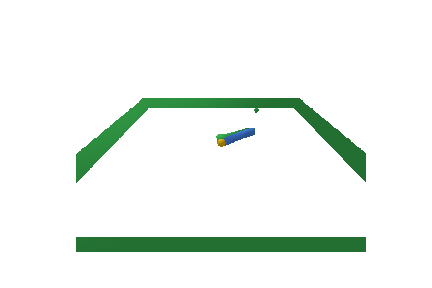
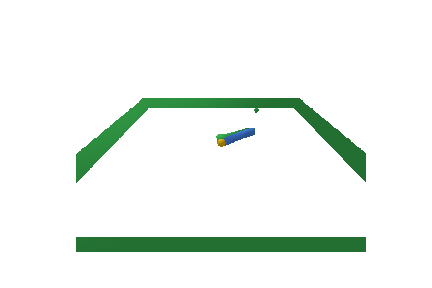
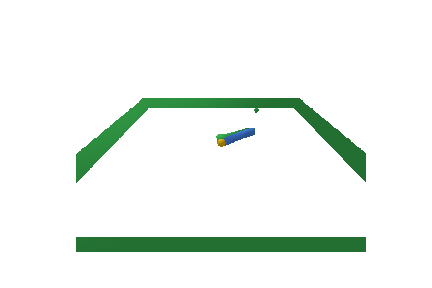
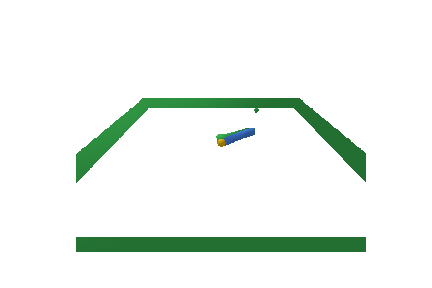
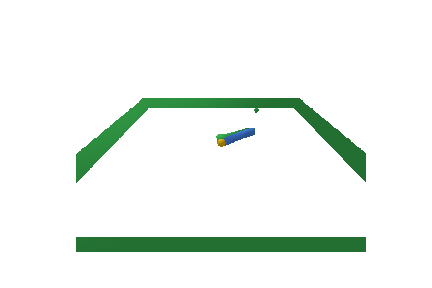
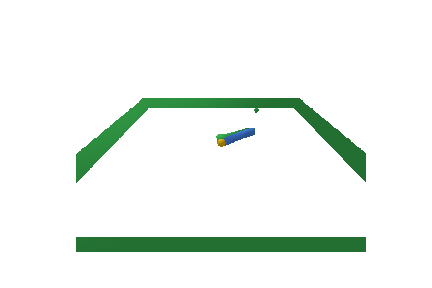
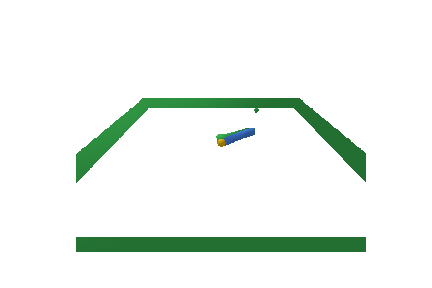
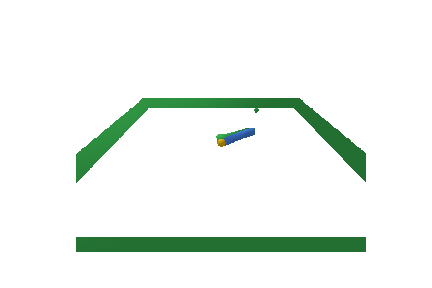
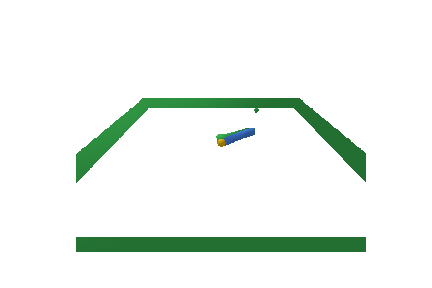
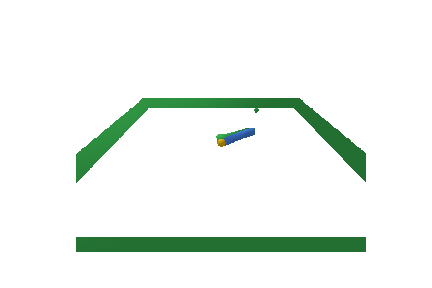
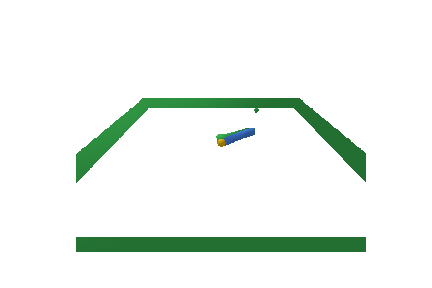
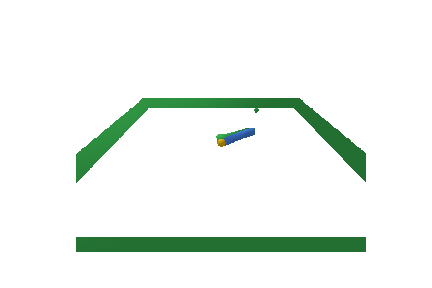
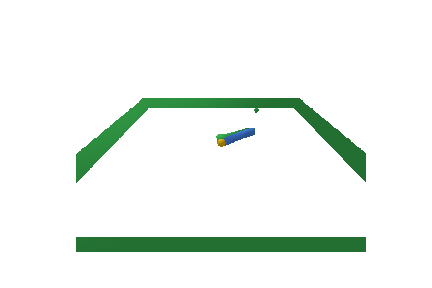
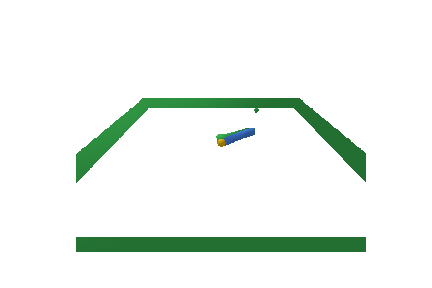
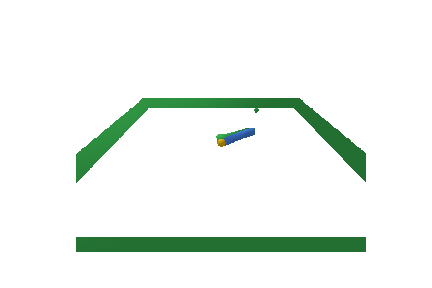
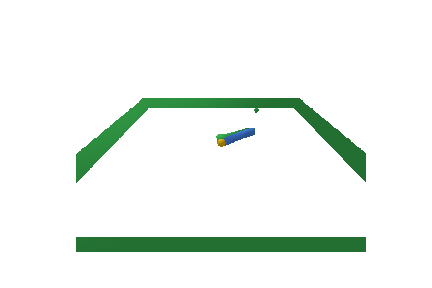
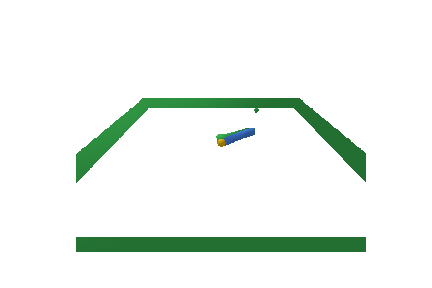
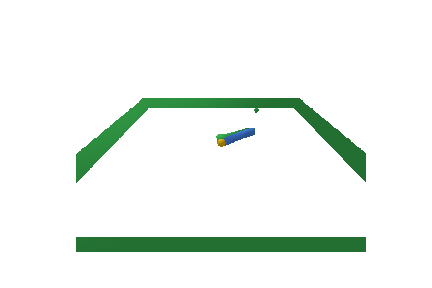
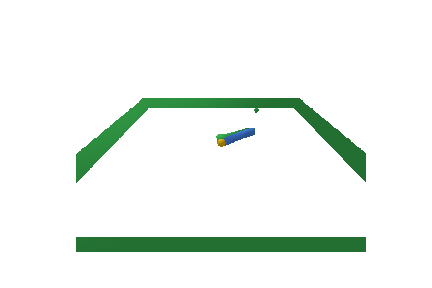
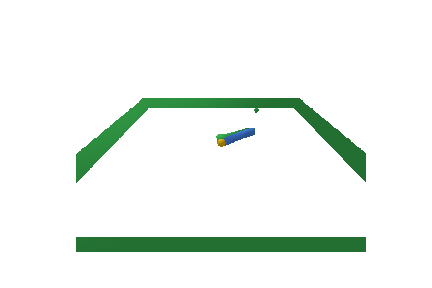
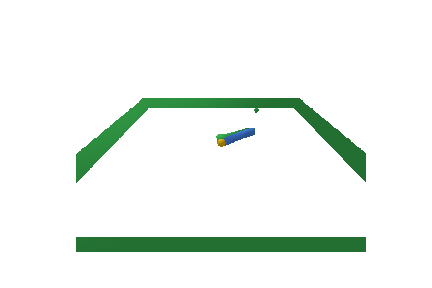
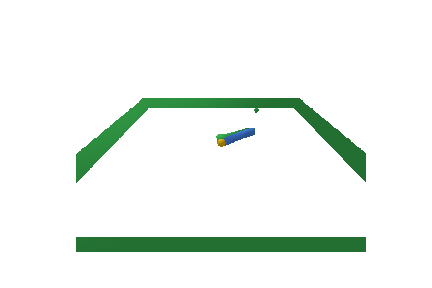
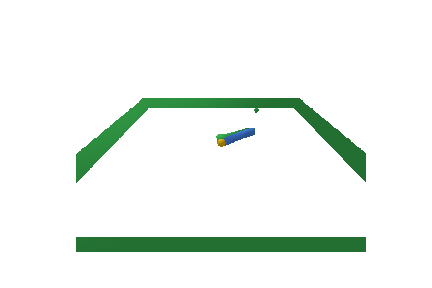
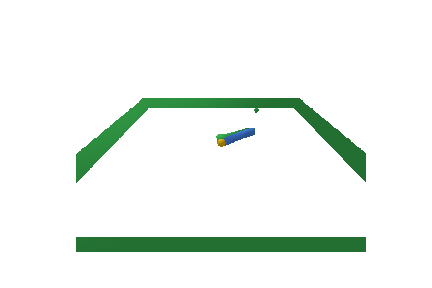
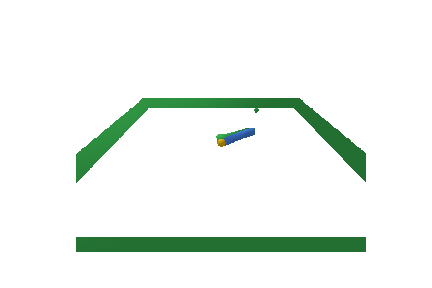
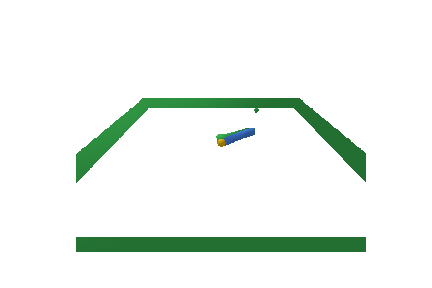
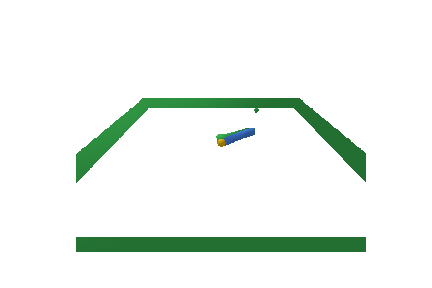
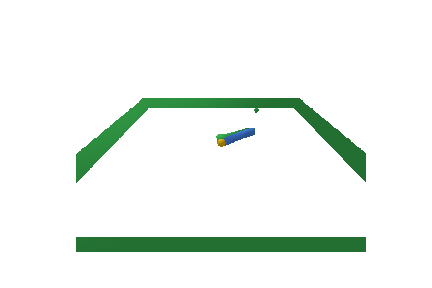
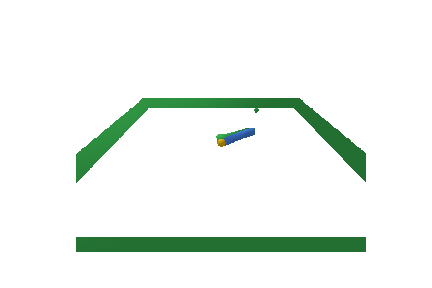
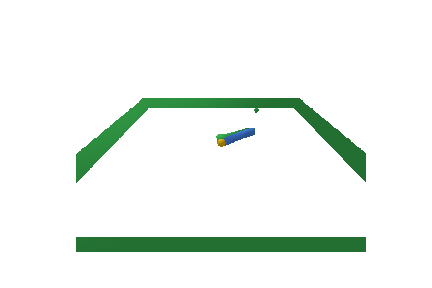
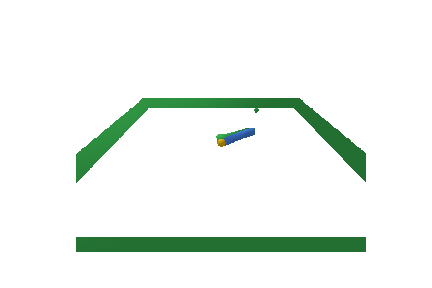
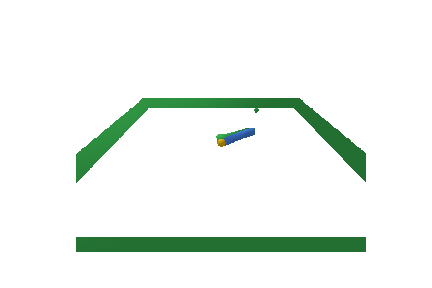
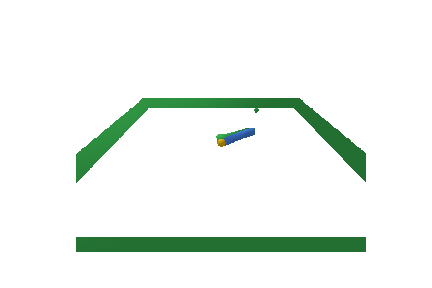
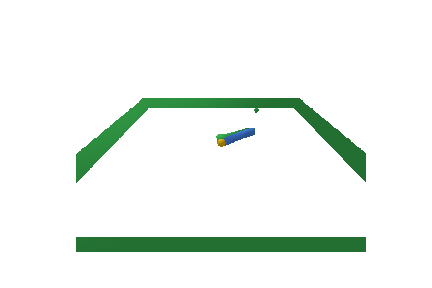
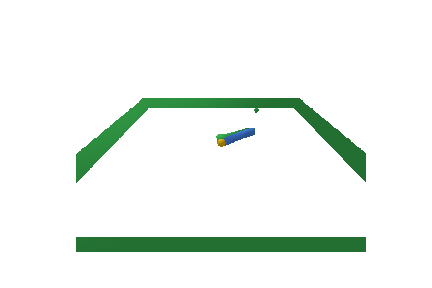
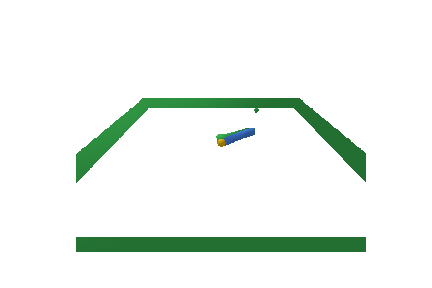
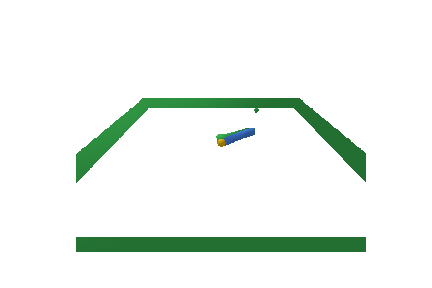
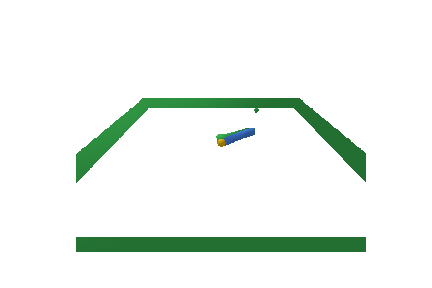

In [8]:
env.close()
display_frames_as_gif(frames)

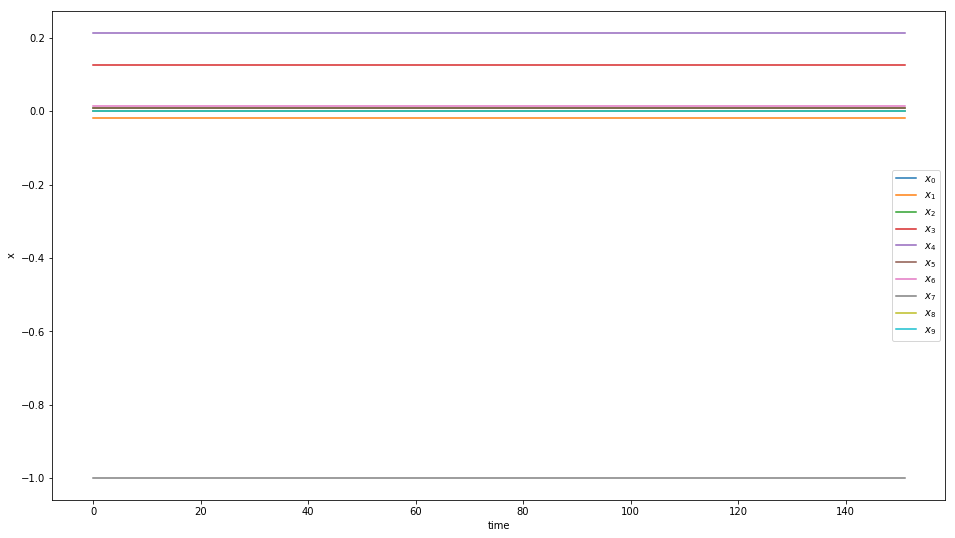

In [9]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.set_xlabel('time')
ax.set_ylabel('x')
for x_dim in range(S_zero.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_zero.shape[1], num=S_zero.shape[1])
    ys = S_zero[x_dim,:]
    ax.plot(xs, ys, label='$x_{}$'.format(x_dim))
ax.legend()

## Random Excitations

In [10]:
frames = []
col_shape = (env.observation_space.shape[0],1)
x0 = env.reset()
S_random = [x0.reshape(col_shape)]
g_random = []
while True:
    frames += [ env.render(mode="rgb_array") ]
    u = env.action_space.sample()
    x, r, done, info = env.step(u)
    S_random.append(x.reshape(col_shape))
    g_random.append(r)
    if done: break
S_random = np.hstack(S_random)
g_random = np.asarray(g_random, dtype=np.float64)
J_random = np.asarray([ np.sum(g_random[k:]) for k in range(g_random.shape[0])], dtype=np.float64)


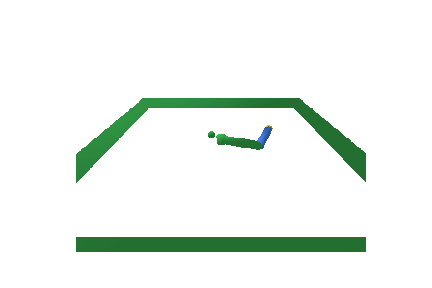
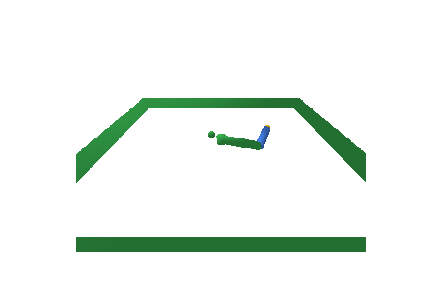
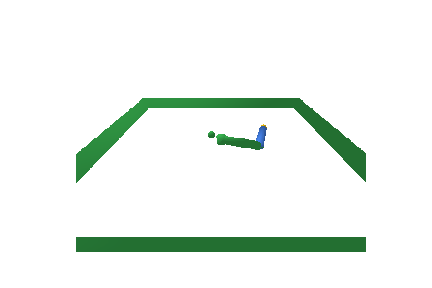
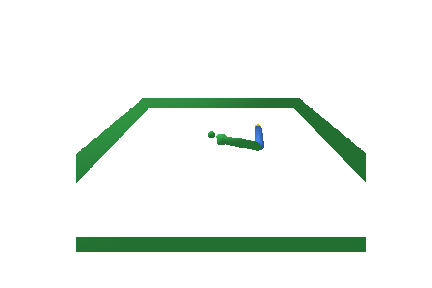
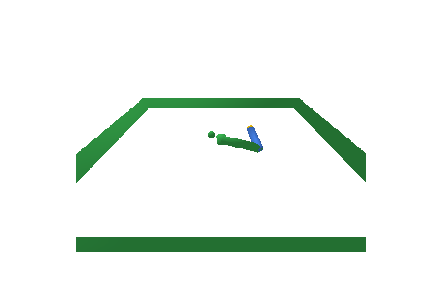
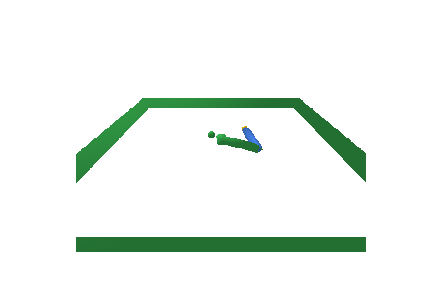
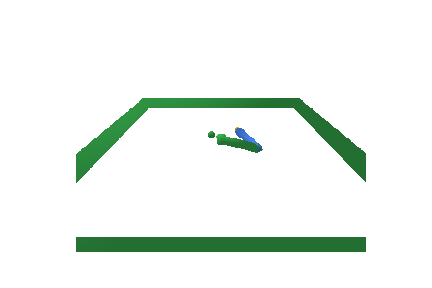
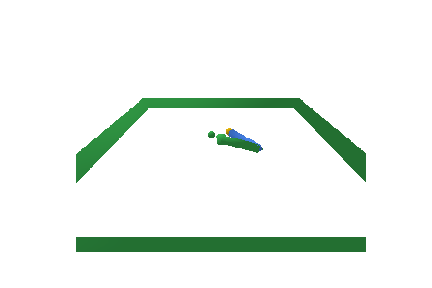
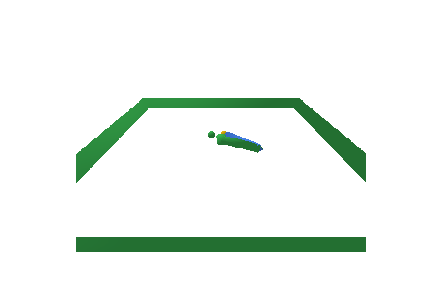
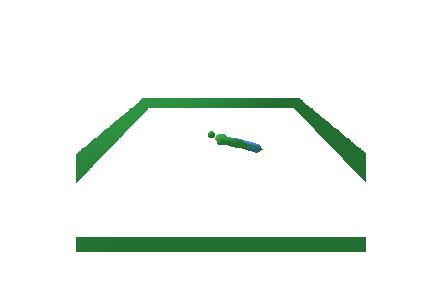
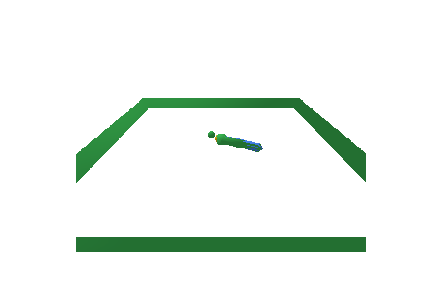
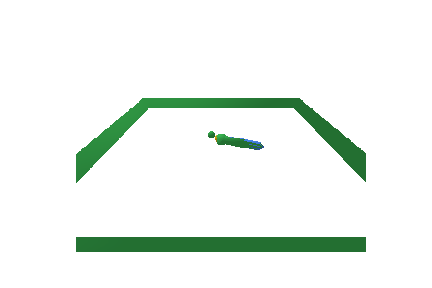
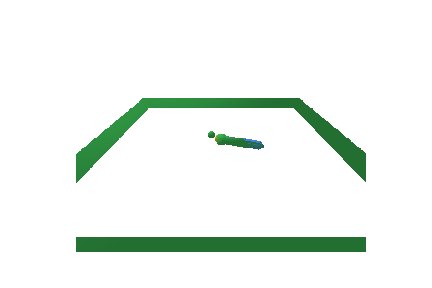
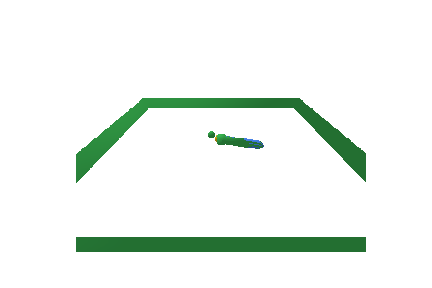
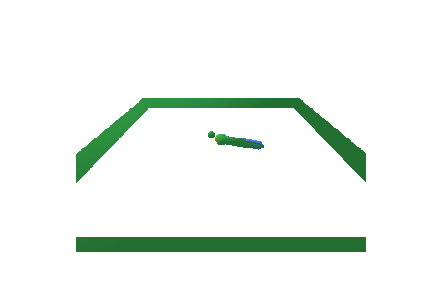
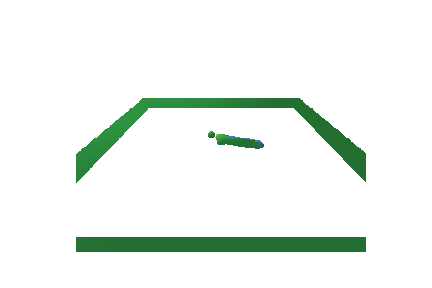
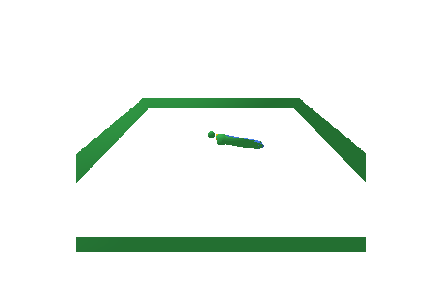
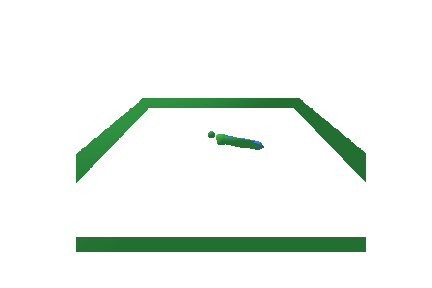
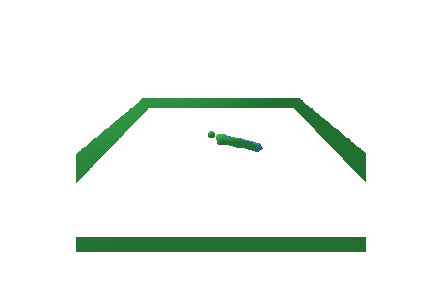
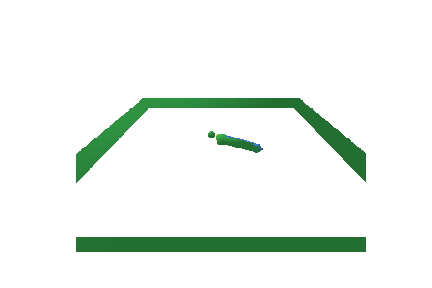
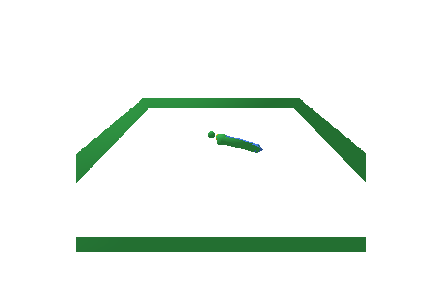
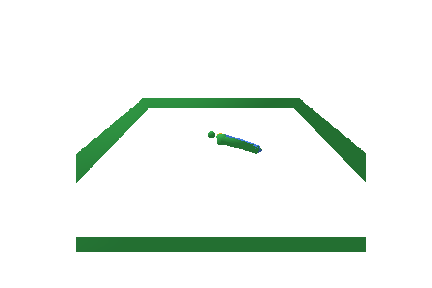
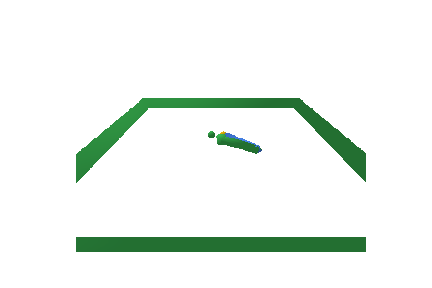
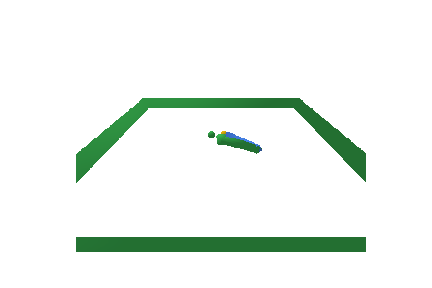
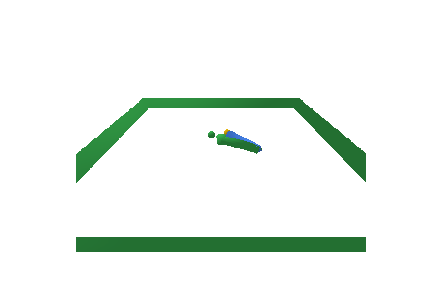
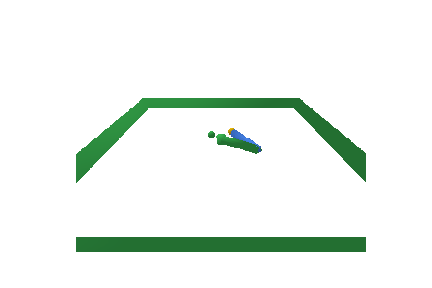
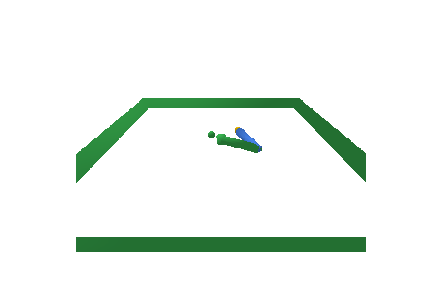
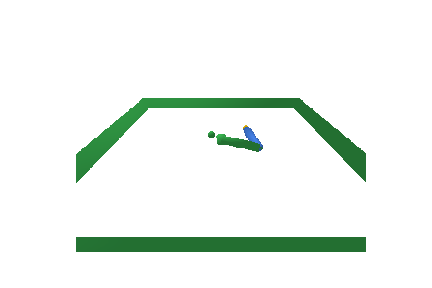
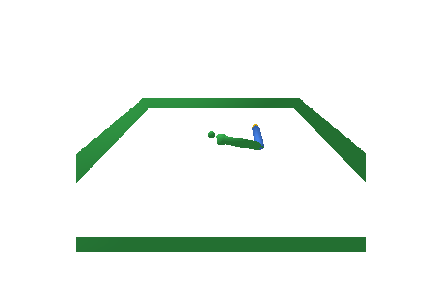
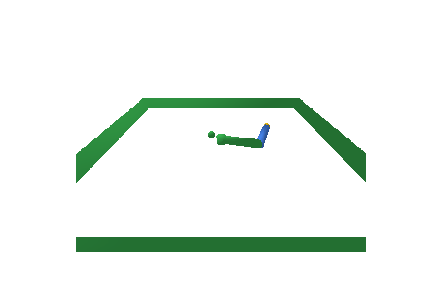
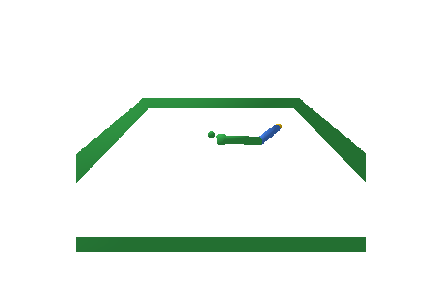
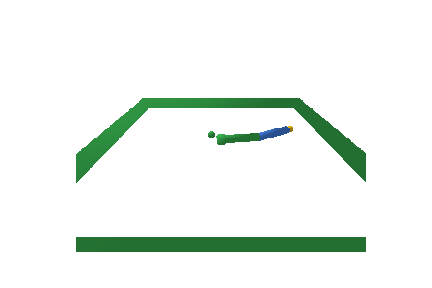
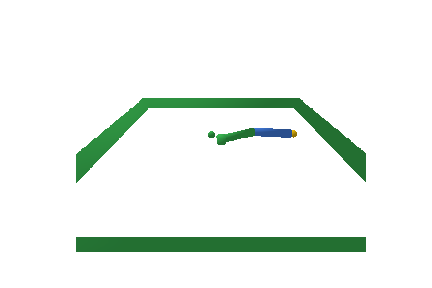
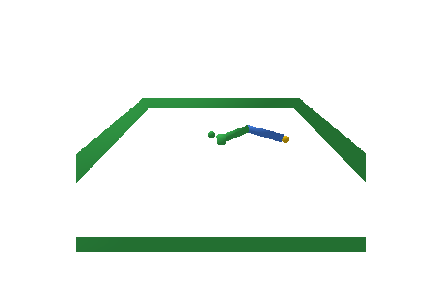
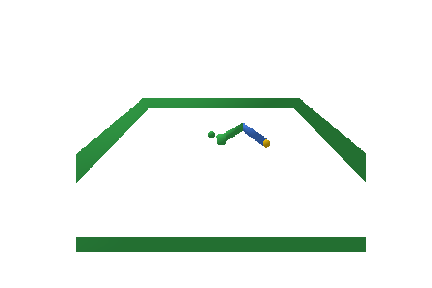
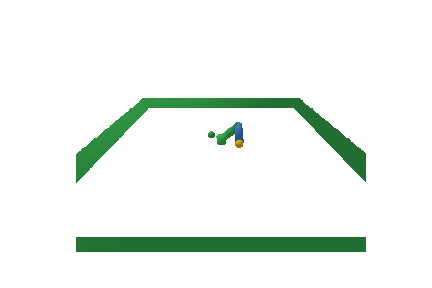
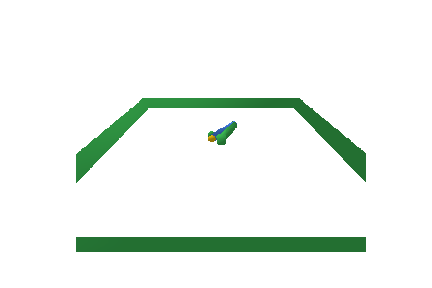
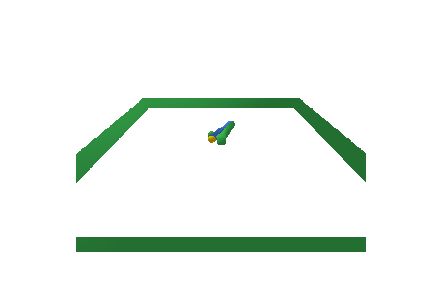
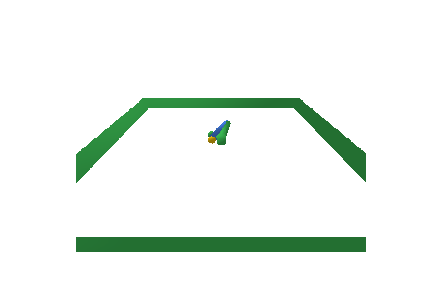
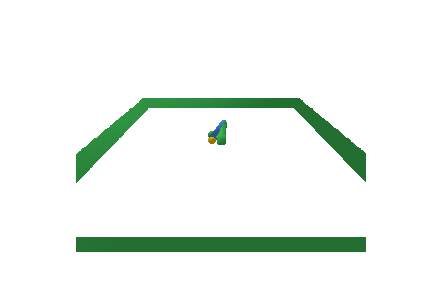
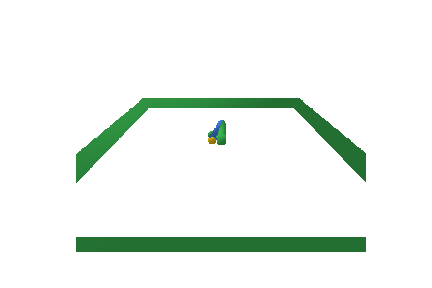
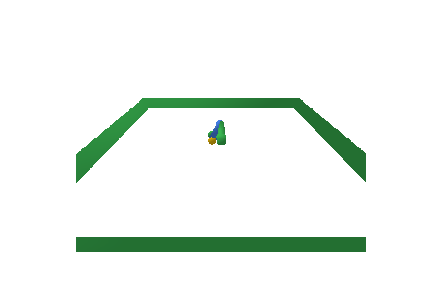
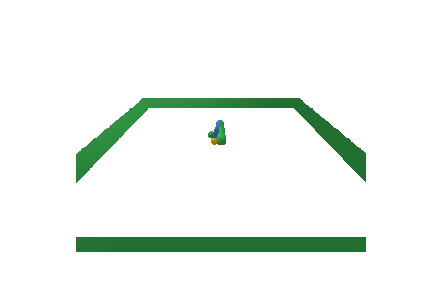
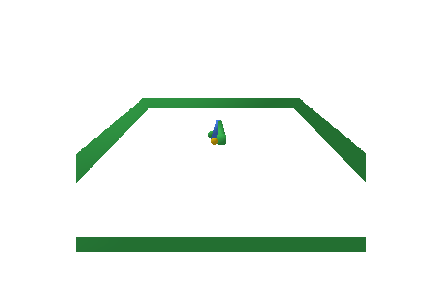
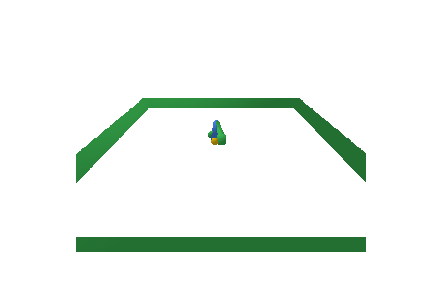
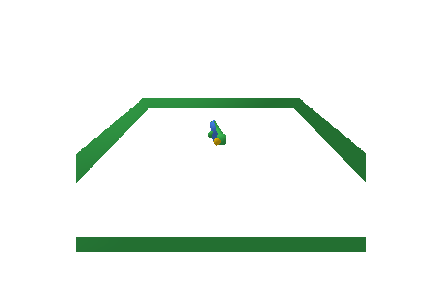
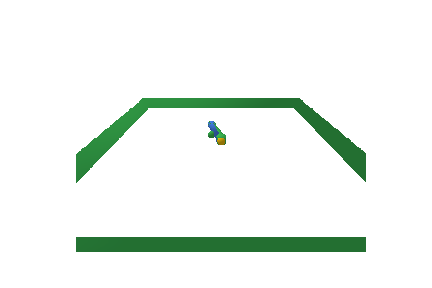
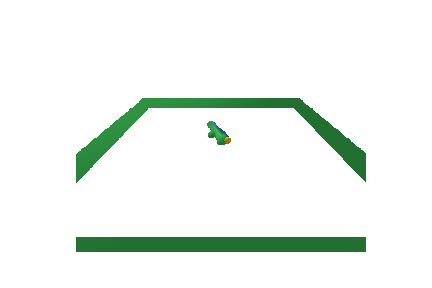
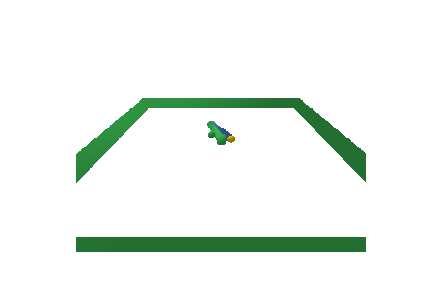
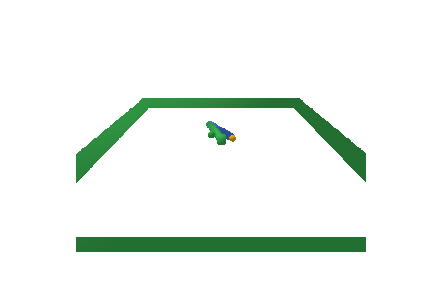
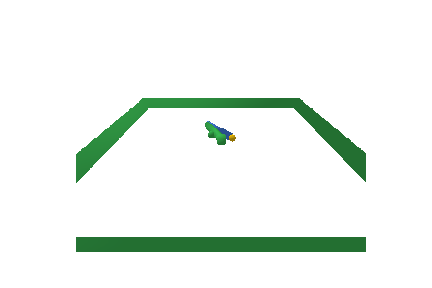
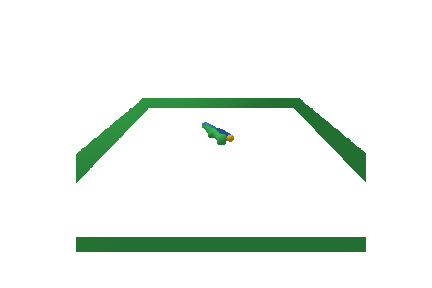
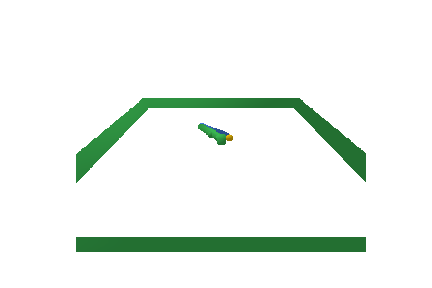
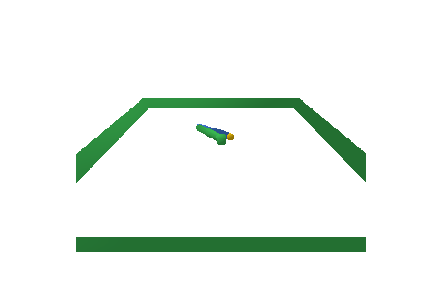
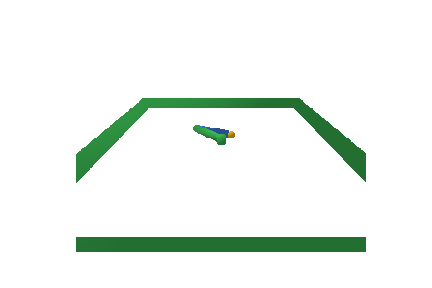
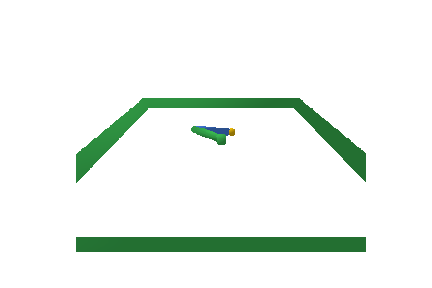
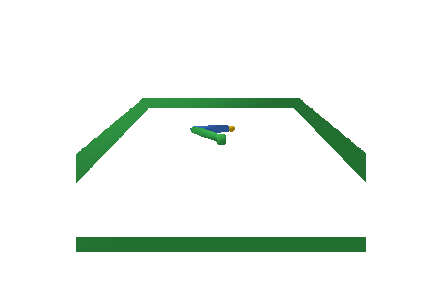
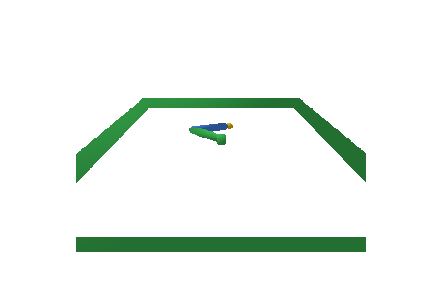
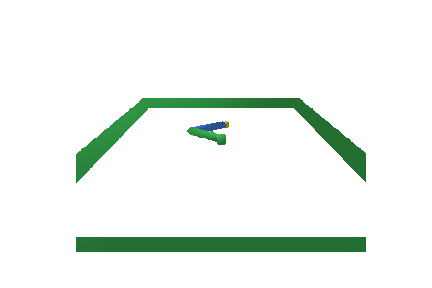
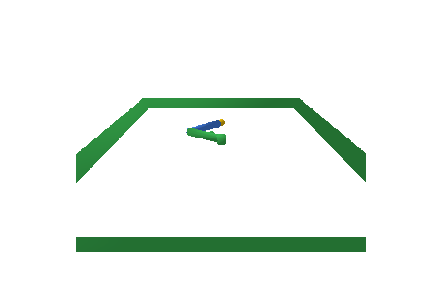
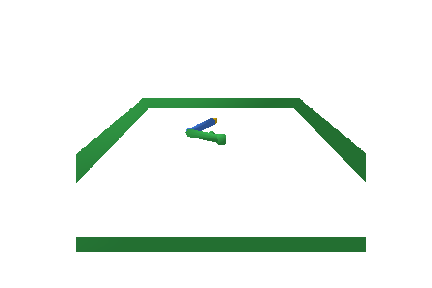
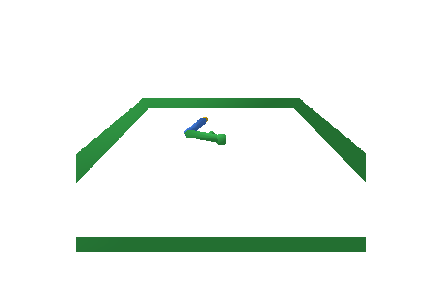
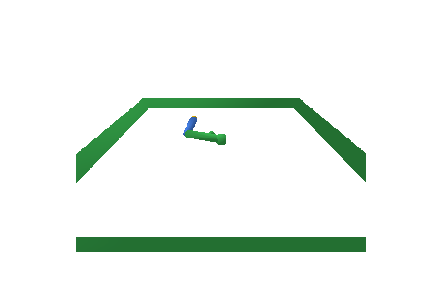
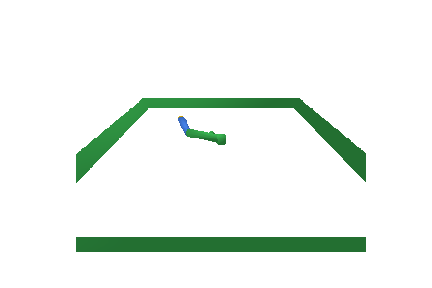
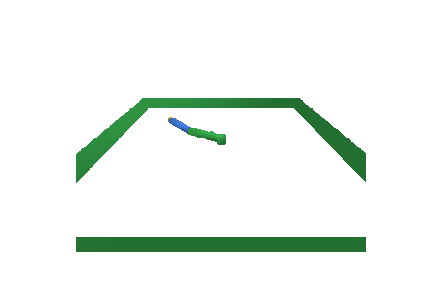
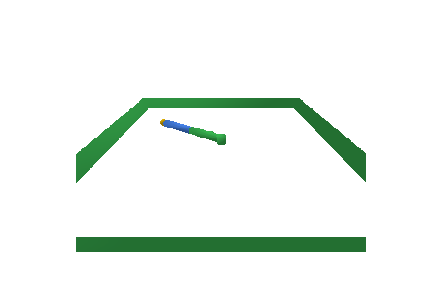
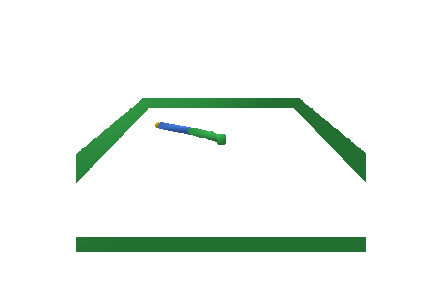
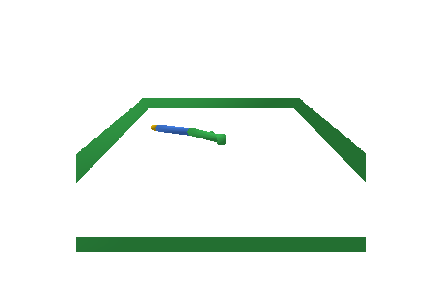
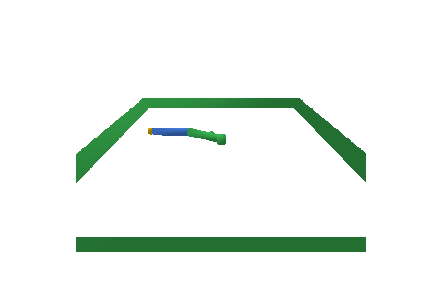
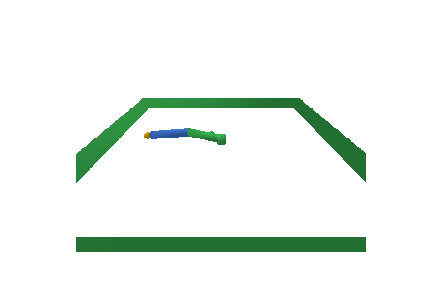
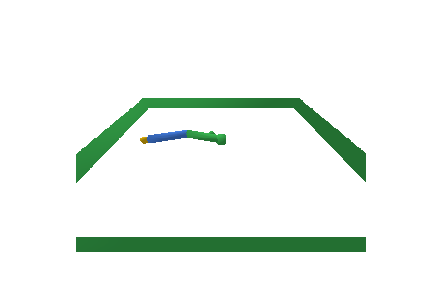
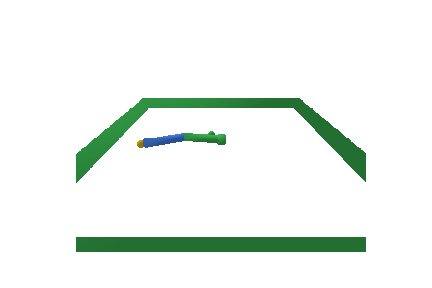
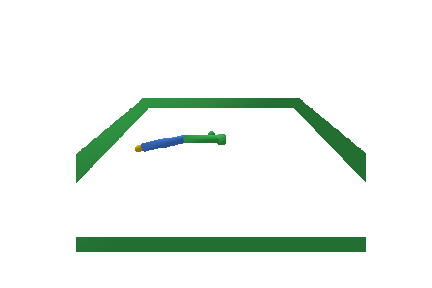
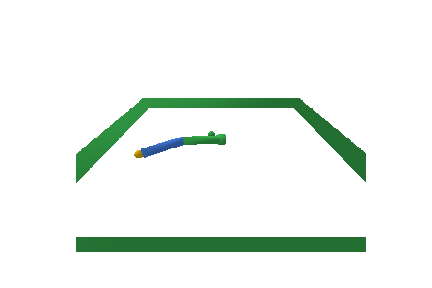
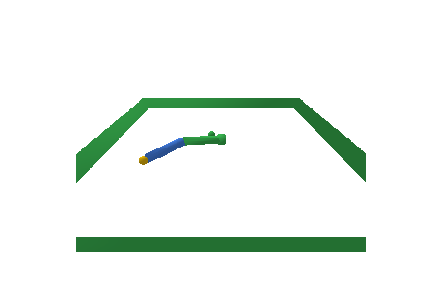
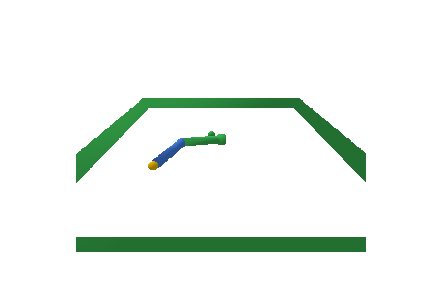
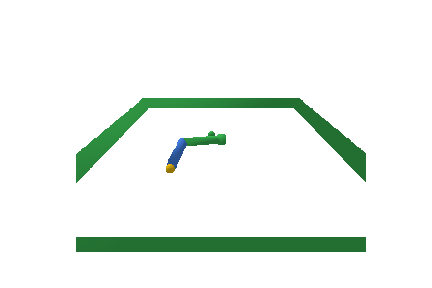
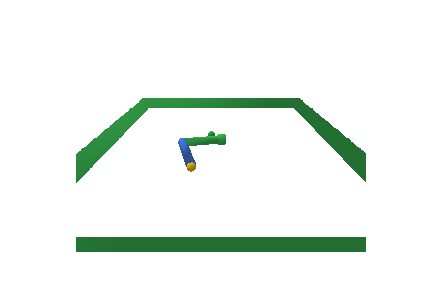
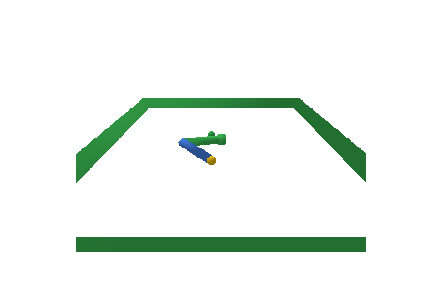
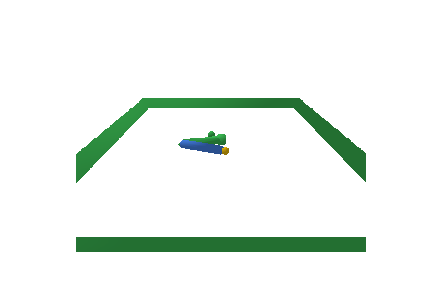
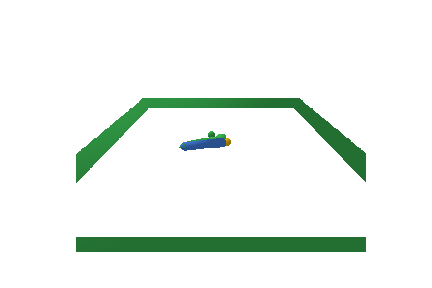
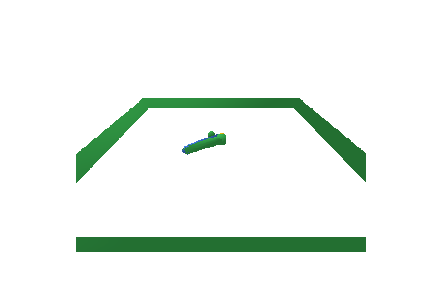
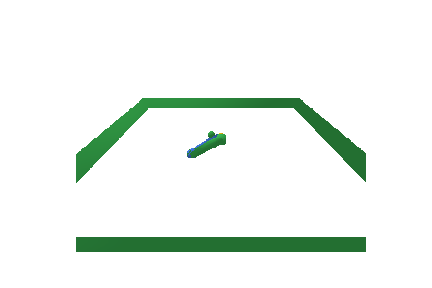
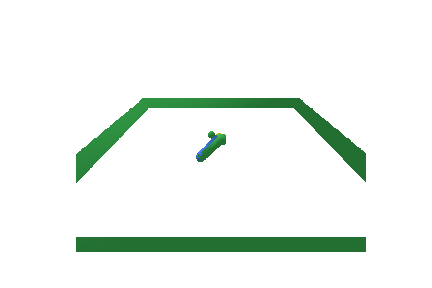
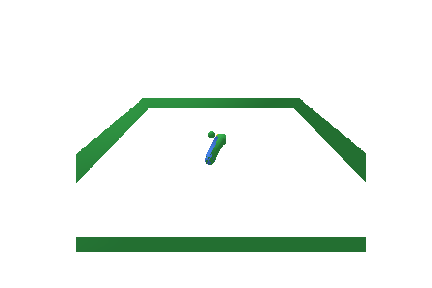
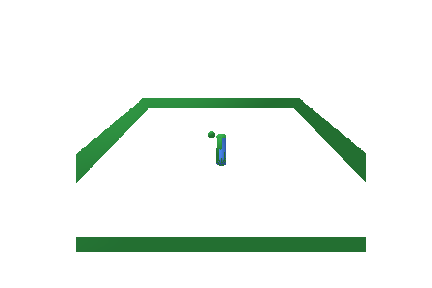
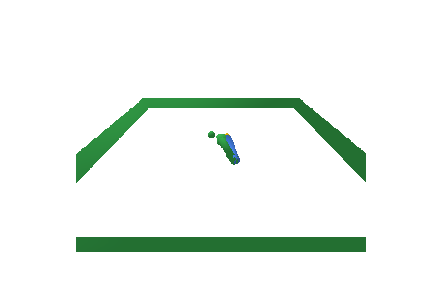
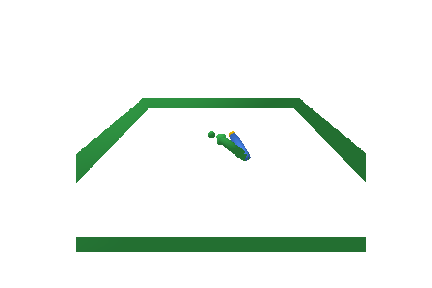
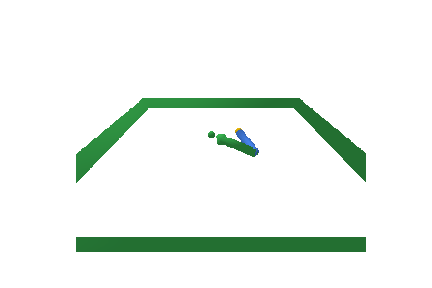
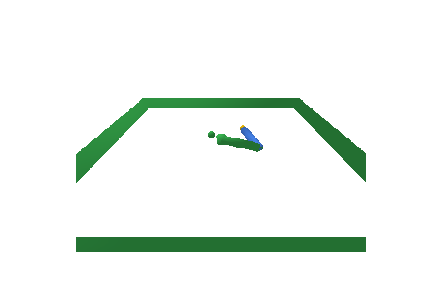
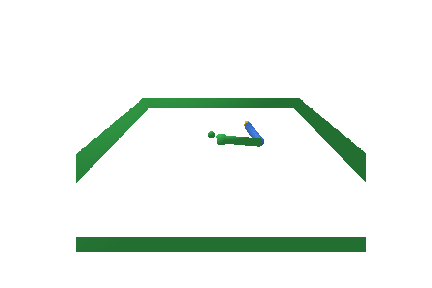
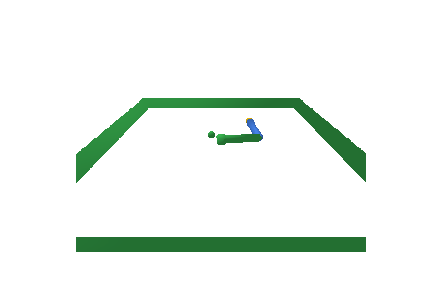
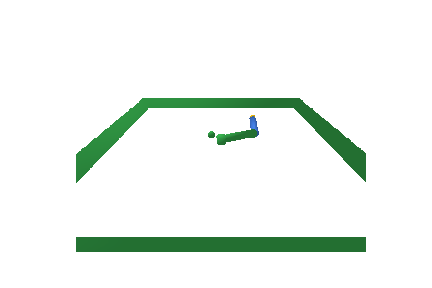
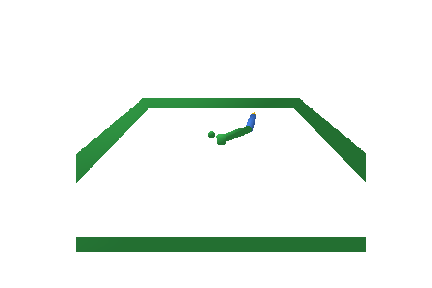
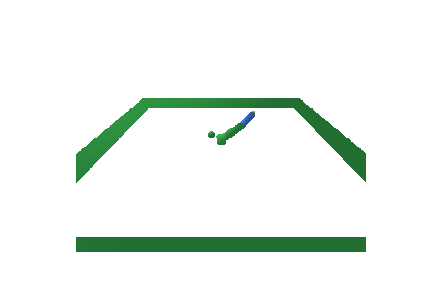
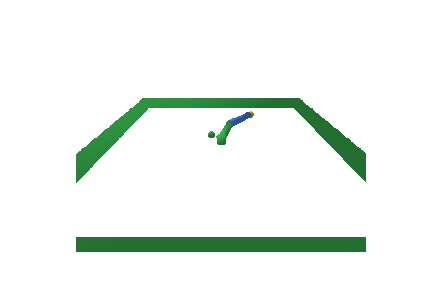
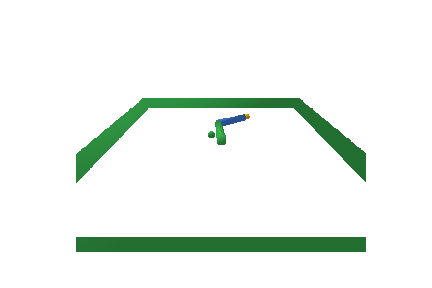
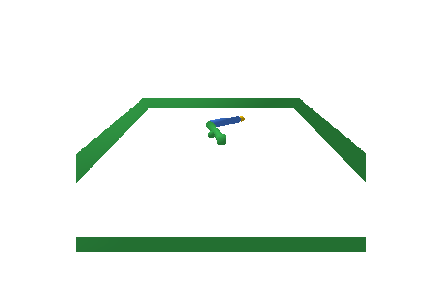
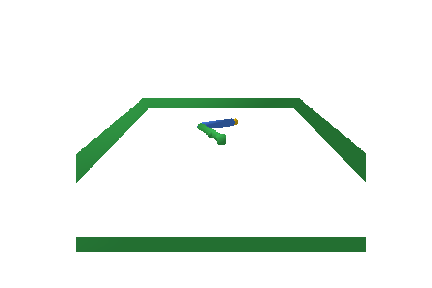
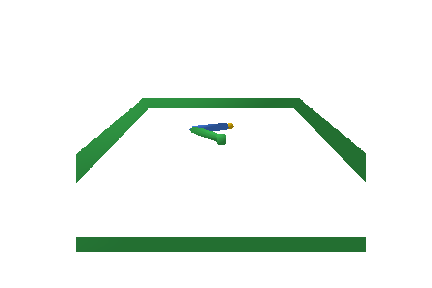
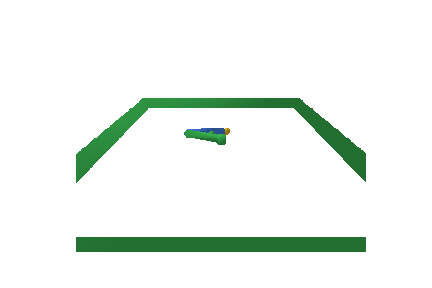
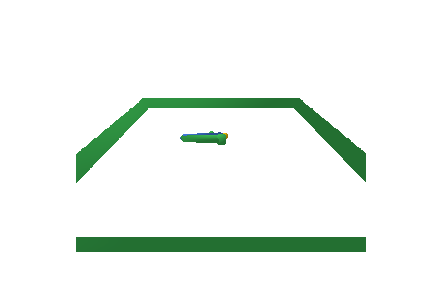
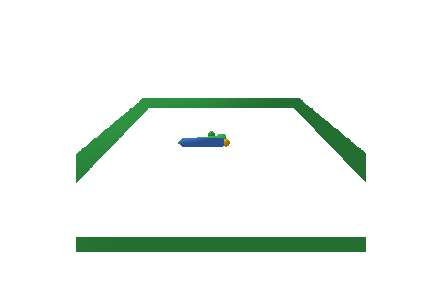
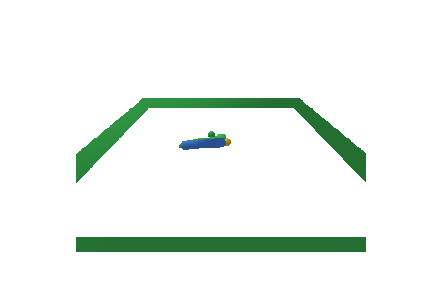
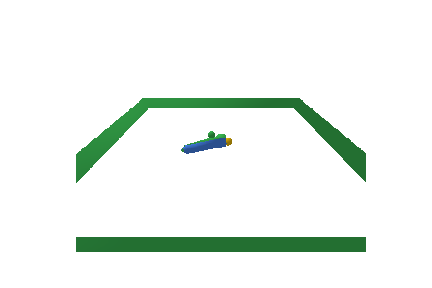
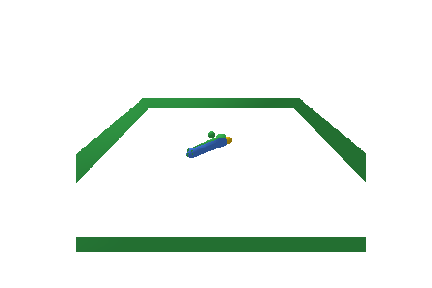
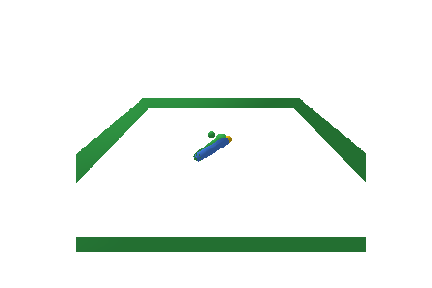
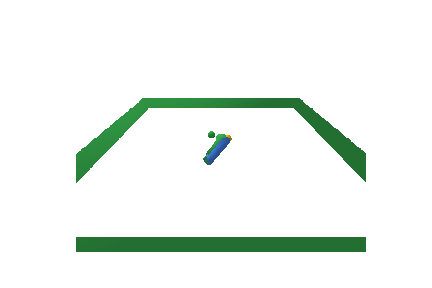
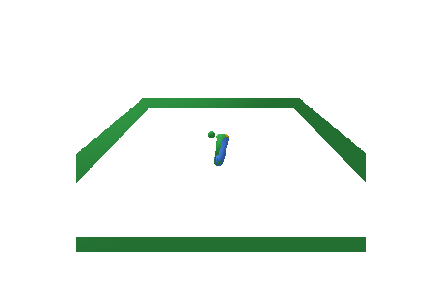
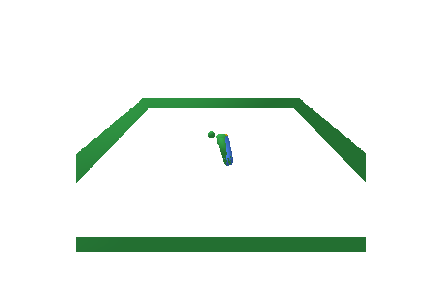
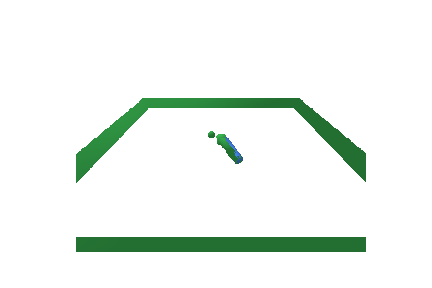
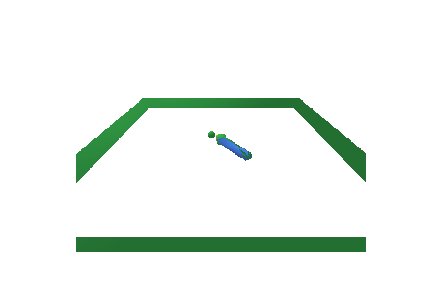
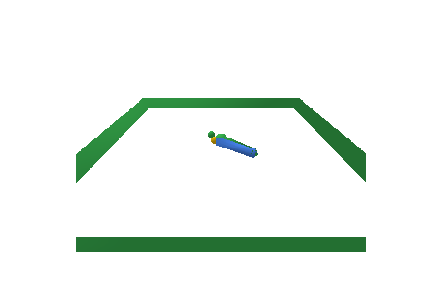
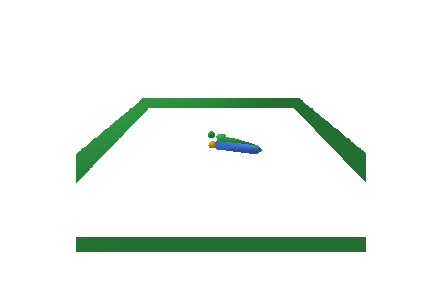
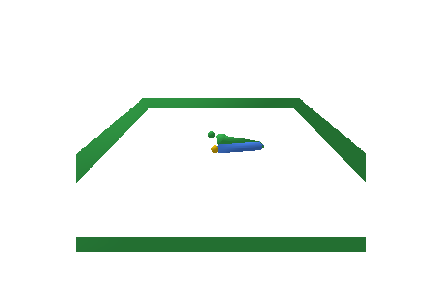
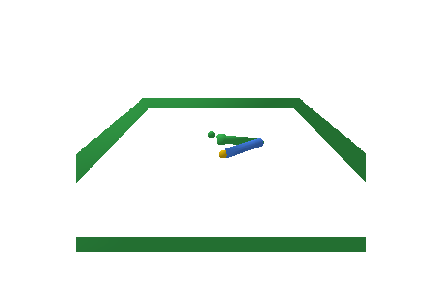
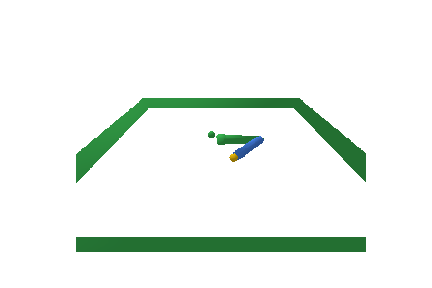
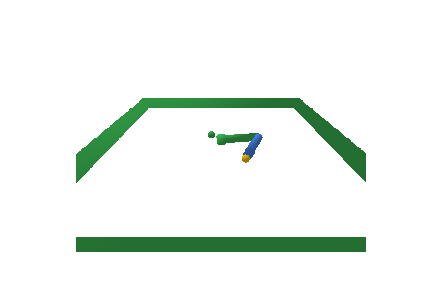
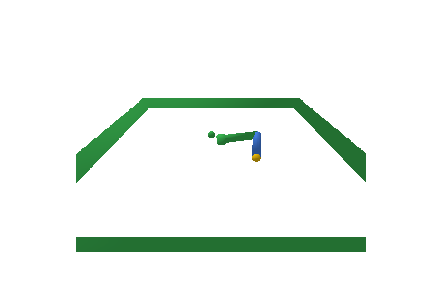
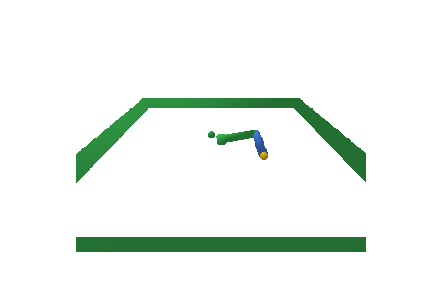
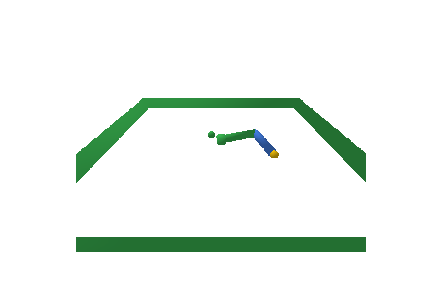
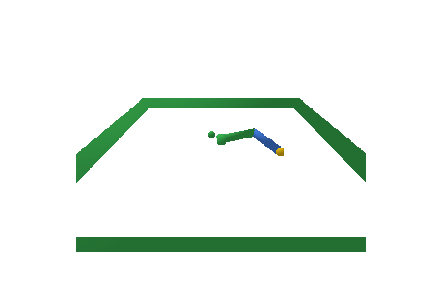
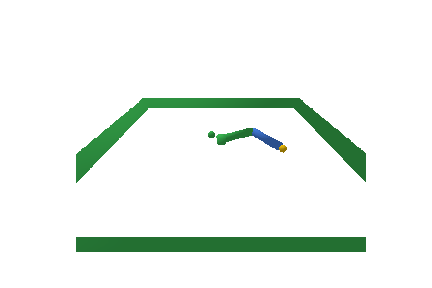
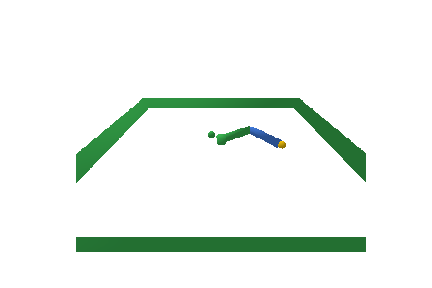
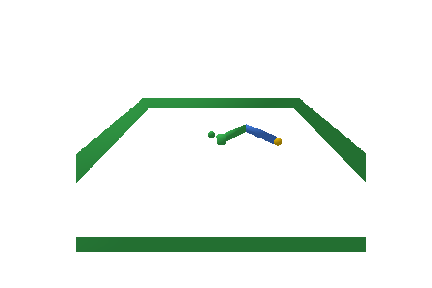
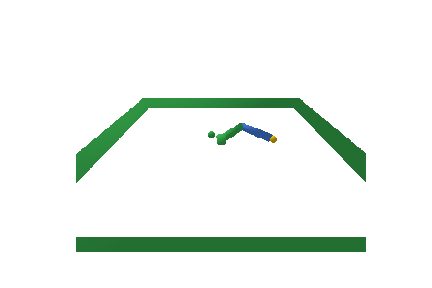
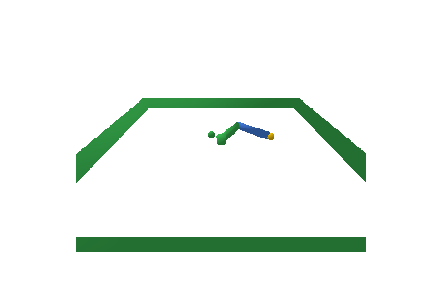
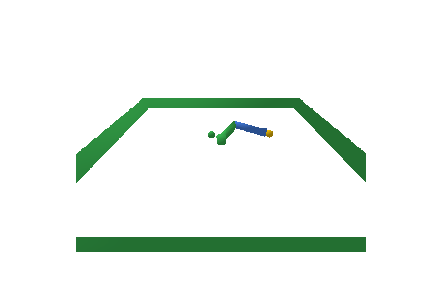
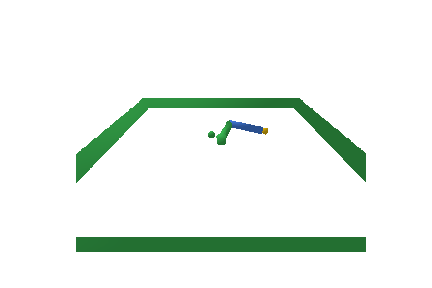
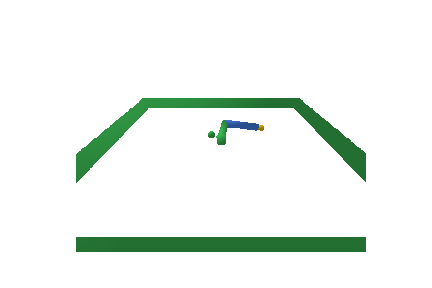
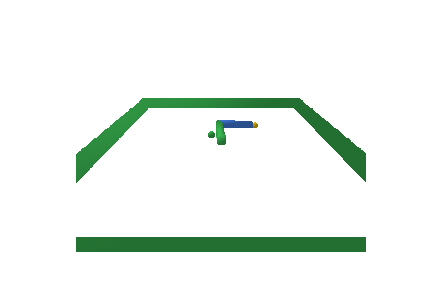
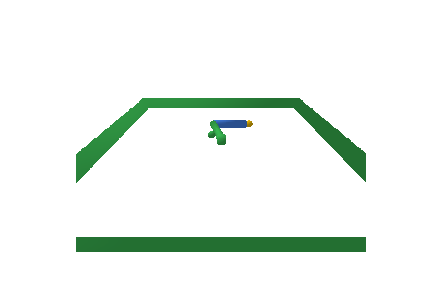
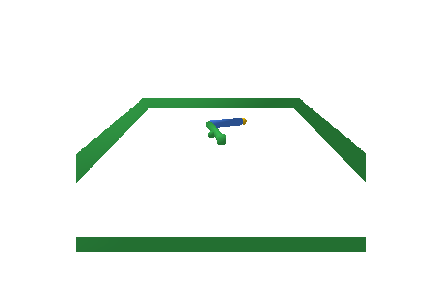
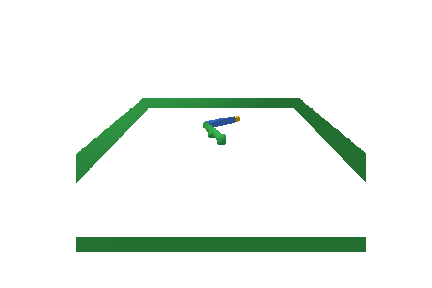
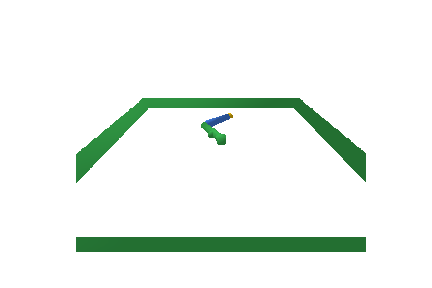
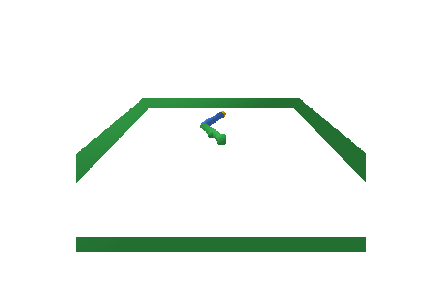
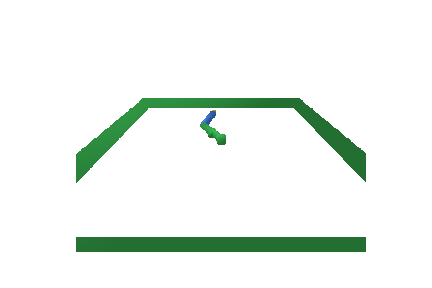
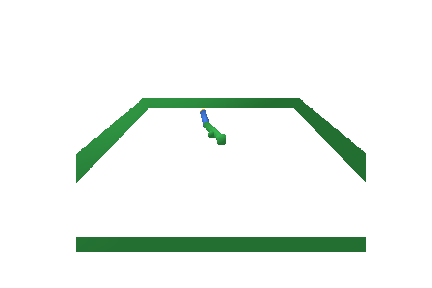
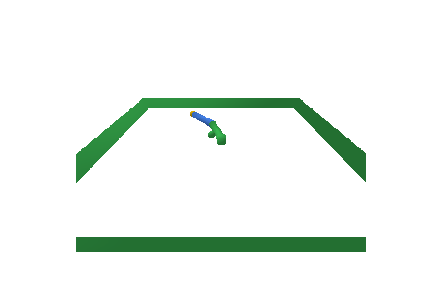
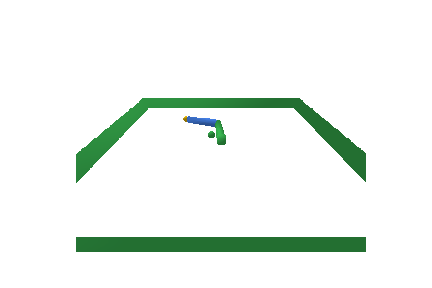
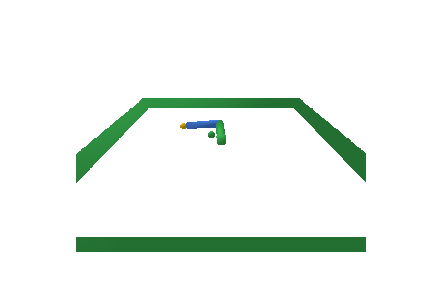
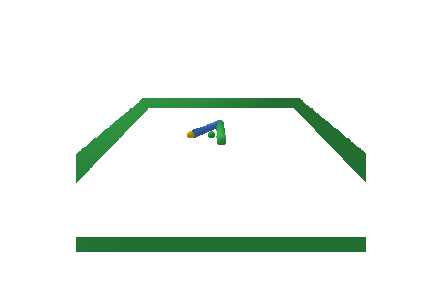
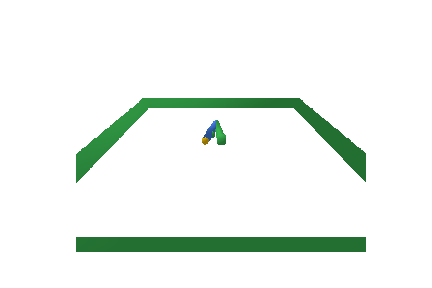
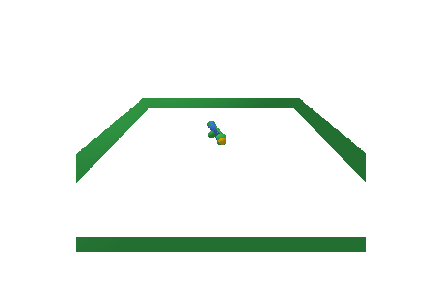
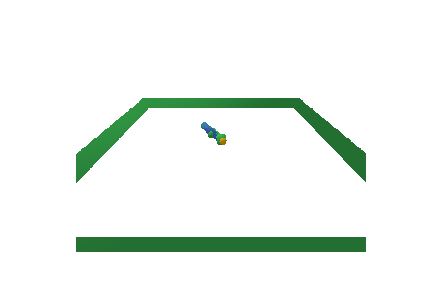
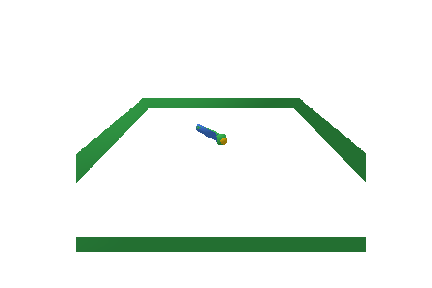
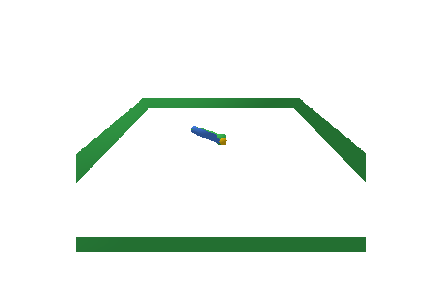
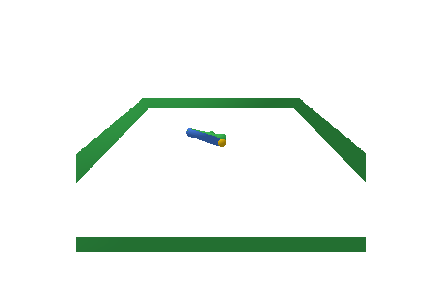
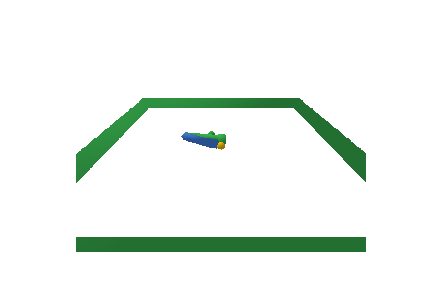
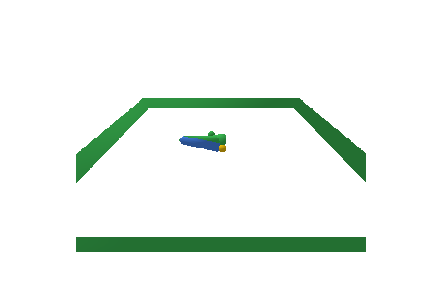

In [11]:
env.close()
display_frames_as_gif(frames)

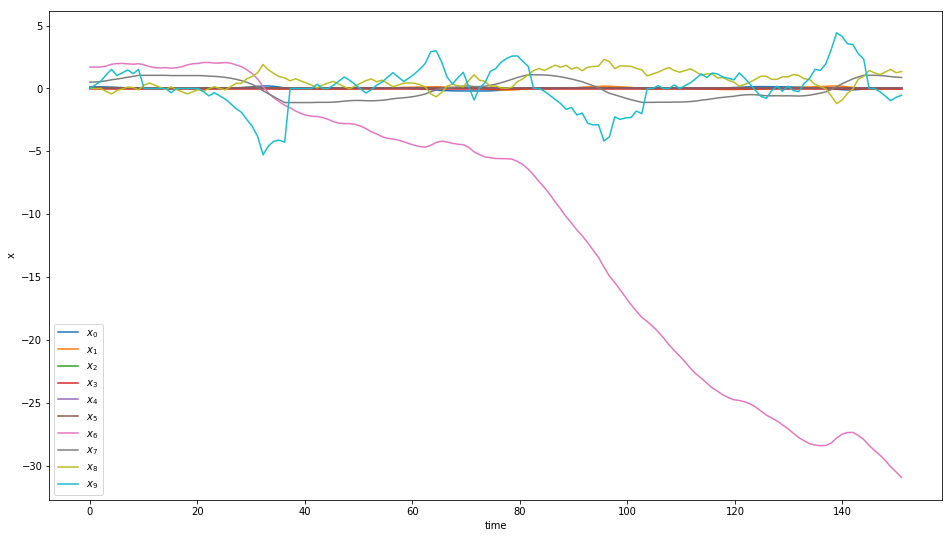

In [12]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax.set_xlabel('time')
ax.set_ylabel('x')
for x_dim in range(S_zero.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_random.shape[1], num=S_random.shape[1])
    ys = S_random[x_dim,:]
    ax.plot(xs, ys, label='$x_{}$'.format(x_dim))
ax.legend()